# CPSC 392 Final Project

* Ethan E. Lopez
* Jane San
* Dr. Yuxin Wen
* November 4, 2025

## Step 1

Data Analysis

In [49]:
from google.colab import drive
drive.mount('/content/drive')

import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
from plotnine import *

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [50]:
data = pd.read_csv('/content/drive/MyDrive/CPSC392/CollegePlacement.csv')
data.head(5)

,College_ID,IQ,Prev_Sem_Result,CGPA,Academic_Performance,Internship_Experience,Extra_Curricular_Score,Communication_Skills,Projects_Completed,Placement
0,CLG0030,107,6.61,6.28,8,No,8,8,4,No
1,CLG0061,97,5.52,5.37,8,No,7,8,0,No
2,CLG0036,109,5.36,5.83,9,No,3,1,1,No
3,CLG0055,122,5.47,5.75,6,Yes,1,6,1,No
4,CLG0004,96,7.91,7.69,7,No,8,10,2,No


In [51]:
data.shape

(10000, 10)

In [52]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   College_ID              10000 non-null  object 
 1   IQ                      10000 non-null  int64  
 2   Prev_Sem_Result         10000 non-null  float64
 3   CGPA                    10000 non-null  float64
 4   Academic_Performance    10000 non-null  int64  
 5   Internship_Experience   10000 non-null  object 
 6   Extra_Curricular_Score  10000 non-null  int64  
 7   Communication_Skills    10000 non-null  int64  
 8   Projects_Completed      10000 non-null  int64  
 9   Placement               10000 non-null  object 
dtypes: float64(2), int64(5), object(3)
memory usage: 781.4+ KB


In [53]:
data.describe()

,IQ,Prev_Sem_Result,CGPA,Academic_Performance,Extra_Curricular_Score,Communication_Skills,Projects_Completed
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,99.471800,7.535673,7.532379,5.546400,4.970900,5.561800,2.513400
std,15.053101,1.447519,1.470141,2.873477,3.160103,2.900866,1.715959
min,41.000000,5.000000,4.540000,1.000000,0.000000,1.000000,0.000000
25%,89.000000,6.290000,6.290000,3.000000,2.000000,3.000000,1.000000
50%,99.000000,7.560000,7.550000,6.000000,5.000000,6.000000,3.000000
75%,110.000000,8.790000,8.770000,8.000000,8.000000,8.000000,4.000000
max,158.000000,10.000000,10.460000,10.000000,10.000000,10.000000,5.000000


In [54]:
# Check for null values
display(data.isnull().sum())

,0
College_ID,0
IQ,0
Prev_Sem_Result,0
CGPA,0
Academic_Performance,0
Internship_Experience,0
Extra_Curricular_Score,0
Communication_Skills,0
Projects_Completed,0
Placement,0


## Step 2

Data Cleaning

In [55]:
data_encoded = data.copy()

data_encoded['Internship_Experience'] = data_encoded['Internship_Experience'].apply(lambda x: 1 if x == 'Yes' else 0)
data_encoded['Placement'] = data_encoded['Placement'].apply(lambda x: 1 if x == 'Yes' else 0)

display(data_encoded.head())

,College_ID,IQ,Prev_Sem_Result,CGPA,Academic_Performance,Internship_Experience,Extra_Curricular_Score,Communication_Skills,Projects_Completed,Placement
0,CLG0030,107,6.61,6.28,8,0,8,8,4,0
1,CLG0061,97,5.52,5.37,8,0,7,8,0,0
2,CLG0036,109,5.36,5.83,9,0,3,1,1,0
3,CLG0055,122,5.47,5.75,6,1,1,6,1,0
4,CLG0004,96,7.91,7.69,7,0,8,10,2,0


In [56]:
data_encoded = data_encoded.drop('College_ID', axis=1)
display(data_encoded.head())

,IQ,Prev_Sem_Result,CGPA,Academic_Performance,Internship_Experience,Extra_Curricular_Score,Communication_Skills,Projects_Completed,Placement
0,107,6.61,6.28,8,0,8,8,4,0
1,97,5.52,5.37,8,0,7,8,0,0
2,109,5.36,5.83,9,0,3,1,1,0
3,122,5.47,5.75,6,1,1,6,1,0
4,96,7.91,7.69,7,0,8,10,2,0


# Q1

**When predicting CGPA, how strong is a model using other variables, and which predictor (among IQ, Projects_Completed, Internship_Experience, Communication_Skills, Prev_Sem_Result) is most influential in improving R²?**

In [57]:
#Set Up

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


In [58]:
from sklearn.preprocessing import StandardScaler

# Separate features and target
X_base = data_encoded[['IQ', 'Prev_Sem_Result', 'Academic_Performance', 'Internship_Experience',
                       'Extra_Curricular_Score', 'Communication_Skills', 'Projects_Completed', 'Placement']]
y = data_encoded['CGPA']

# Apply Z-score normalization to continuous predictors
scaler = StandardScaler()
X_base_scaled = X_base.copy()
continuous_cols = ['IQ', 'Prev_Sem_Result', 'Academic_Performance', 'Extra_Curricular_Score',
                   'Communication_Skills', 'Projects_Completed']
X_base_scaled[continuous_cols] = scaler.fit_transform(X_base[continuous_cols])

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_base_scaled, y, test_size=0.2, random_state=42)


In [59]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import pandas as pd

# Train the baseline model
model_base = LinearRegression()
model_base.fit(X_train, y_train)

# Make predictions on training and testing sets
y_train_pred_base = model_base.predict(X_train)
y_test_pred_base = model_base.predict(X_test)

# Calculate R^2 for the baseline model (used in subsequent cells)
r2_base = r2_score(y_test, y_test_pred_base)

# Function for Mean Absolute Percentage Error (MAPE)
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    # Avoid division by zero by replacing 0 with a small epsilon
    return np.mean(np.abs((y_true - y_pred) / np.maximum(y_true, np.finfo(float).eps))) * 100

# Calculate metrics for the training set
mse_train = mean_squared_error(y_train, y_train_pred_base)
mae_train = mean_absolute_error(y_train, y_train_pred_base)
mape_train = mean_absolute_percentage_error(y_train, y_train_pred_base)
rmse_train = np.sqrt(mse_train)
r2_train = r2_score(y_train, y_train_pred_base)

# Calculate metrics for the testing set
mse_test = mean_squared_error(y_test, y_test_pred_base)
mae_test = mean_absolute_error(y_test, y_test_pred_base)
mape_test = mean_absolute_percentage_error(y_test, y_test_pred_base)
rmse_test = np.sqrt(mse_test)
r2_test = r2_score(y_test, y_test_pred_base)

# Create a DataFrame to display the results
metrics_df = pd.DataFrame({
    'Metric': ['MSE', 'MAE', 'MAPE', 'RMSE', 'R^2'],
    'Training Set': [mse_train, mae_train, mape_train, rmse_train, r2_train],
    'Testing Set': [mse_test, mae_test, mape_test, rmse_test, r2_test]
})

print("\nRegression Model Performance Metrics:")
display(metrics_df.round(4))



Regression Model Performance Metrics:


,Metric,Training Set,Testing Set
0,MSE,0.0821,0.0814
1,MAE,0.2479,0.2479
2,MAPE,3.4346,3.4329
3,RMSE,0.2866,0.2854
4,R^2,0.9621,0.9620


In [60]:
#Leave-One-Out Models

features_to_remove = ['IQ', 'Projects_Completed', 'Internship_Experience', 'Communication_Skills', 'Prev_Sem_Result']
r2_results = {'Baseline': r2_base}

for f in features_to_remove:
    X_temp = X_base.drop(columns=[f])
    X_train, X_test, y_train, y_test = train_test_split(X_temp, y, test_size=0.2, random_state=42)
    model = LinearRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    r2_results[f'Remove {f}'] = round(r2, 3)

r2_results

{'Baseline': 0.9619752956201426,
 'Remove IQ': 0.962,
 'Remove Projects_Completed': 0.962,
 'Remove Internship_Experience': 0.962,
 'Remove Communication_Skills': 0.962,
 'Remove Prev_Sem_Result': 0.136}

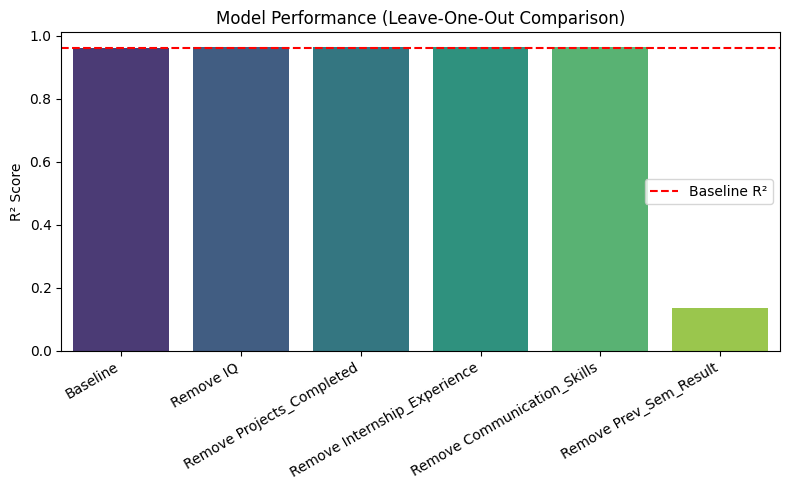

In [61]:
#Visualize R² Changes

plt.figure(figsize=(8,5))
sns.barplot(x=list(r2_results.keys()), y=list(r2_results.values()), palette="viridis")
plt.axhline(y=r2_base, color='red', linestyle='--', label='Baseline R²')
plt.title("Model Performance (Leave-One-Out Comparison)")
plt.ylabel("R² Score")
plt.xticks(rotation=30, ha='right')  # Rotate labels for readability
plt.legend()
plt.tight_layout()
plt.show()



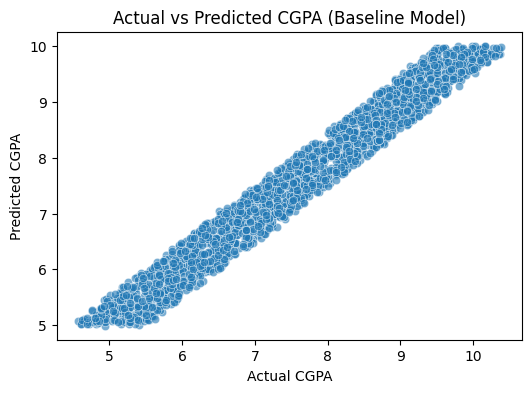

In [62]:
#Actual vs Predicted CGPA

plt.figure(figsize=(6,4))
sns.scatterplot(x=y_test, y=y_test_pred_base, alpha=0.6)
plt.xlabel("Actual CGPA")
plt.ylabel("Predicted CGPA")
plt.title("Actual vs Predicted CGPA (Baseline Model)")
plt.show()

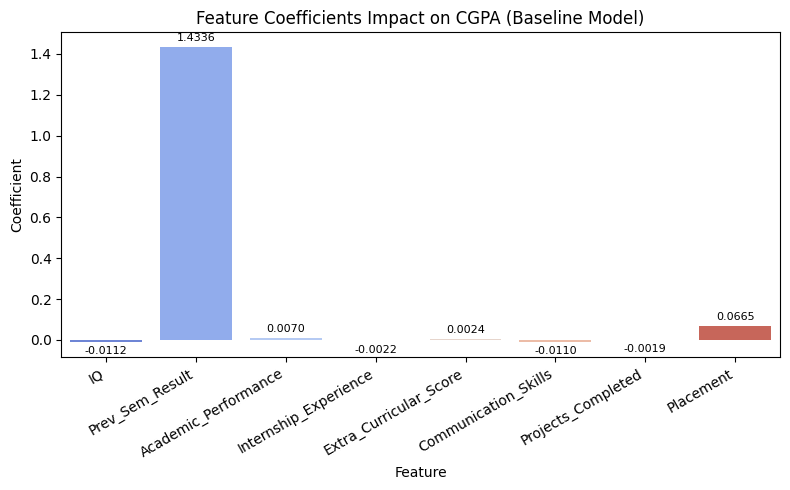

In [63]:
#Coefficient Comparison

coef_df = pd.DataFrame({'Feature': X_base.columns, 'Coefficient': model_base.coef_})

plt.figure(figsize=(8,5))
ax = sns.barplot(x='Feature', y='Coefficient', data=coef_df, palette="coolwarm")
plt.title("Feature Coefficients Impact on CGPA (Baseline Model)")
plt.ylabel("Coefficient")
plt.xticks(rotation=30, ha='right')

# Add numerical labels to the bars
for container in ax.containers:
    ax.bar_label(container, fmt='%.4f', label_type='edge', fontsize=8, padding=3)

plt.tight_layout()
plt.show()

# Q2

**How well does a classification model predict whether a student gets placed after graduation, and which factor is most important in making that prediction?**


In [64]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Features (exclude Placement) and Target
X = data_encoded[['CGPA', 'Prev_Sem_Result', 'IQ', 'Academic_Performance',
                  'Extra_Curricular_Score', 'Communication_Skills',
                  'Projects_Completed', 'Internship_Experience']]
y = data_encoded['Placement']

# Identify continuous features for scaling
continuous_features_q2 = ['CGPA', 'Prev_Sem_Result', 'IQ', 'Academic_Performance',
                          'Extra_Curricular_Score', 'Communication_Skills',
                          'Projects_Completed']

# Initialize StandardScaler
scaler_q2 = StandardScaler()

# Apply StandardScaler to continuous features in X
X_scaled = X.copy() # Create a copy to store scaled data
X_scaled[continuous_features_q2] = scaler_q2.fit_transform(X[continuous_features_q2])

# Train-test split using the scaled features
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

print("Data for Q2 prepared and continuous features scaled.")
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")

Data for Q2 prepared and continuous features scaled.
X_train shape: (8000, 8)
X_test shape: (2000, 8)


In [65]:
#Logistic Regression

from sklearn.linear_model import LogisticRegression

model_log = LogisticRegression()
model_log.fit(X_train, y_train)

# Predictions
y_pred = model_log.predict(X_test)
y_prob = model_log.predict_proba(X_test)[:, 1]

In [66]:
#Evaluation of the Model

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)

print(f"Accuracy: {accuracy:.3f}")
print(f"Precision: {precision:.3f}")
print(f"Recall: {recall:.3f}")
print(f"F1 Score: {f1:.3f}")
print(f"ROC AUC: {roc_auc:.3f}")

Accuracy: 0.903
Precision: 0.753
Recall: 0.607
F1 Score: 0.672
ROC AUC: 0.944


In [67]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import numpy as np
import pandas as pd

# Ensure training predictions are available for model_log (Q2)
y_train_pred = model_log.predict(X_train)
y_train_prob = model_log.predict_proba(X_train)[:, 1]

# Calculate metrics for the training set
accuracy_train = accuracy_score(y_train, y_train_pred)
precision_train = precision_score(y_train, y_train_pred)
recall_train = recall_score(y_train, y_train_pred)
f1_train = f1_score(y_train, y_train_pred)
roc_auc_train = roc_auc_score(y_train, y_train_prob)

# Metrics for the testing set are already available from cell 253df9d5
# accuracy, precision, recall, f1, roc_auc

# Create a DataFrame to display the results
metrics_q2_df = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC AUC'],
    'Training Set': [accuracy_train, precision_train, recall_train, f1_train, roc_auc_train],
    'Testing Set': [accuracy, precision, recall, f1, roc_auc] # Using pre-calculated test metrics
})

print("\nLogistic Regression Model Performance Metrics (Question 2):")
display(metrics_q2_df.round(4))


Logistic Regression Model Performance Metrics (Question 2):


,Metric,Training Set,Testing Set
0,Accuracy,0.9020,0.9035
1,Precision,0.7553,0.7529
2,Recall,0.6092,0.6074
3,F1 Score,0.6744,0.6723
4,ROC AUC,0.9405,0.9442


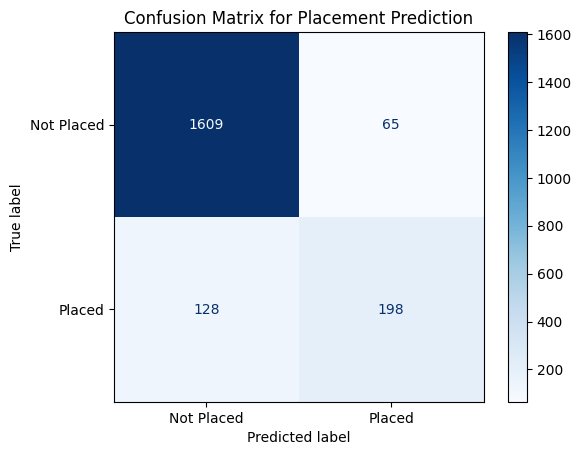

In [68]:
#Confusion Matrix

from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Not Placed', 'Placed'])
disp.plot(cmap='Blues')
plt.title("Confusion Matrix for Placement Prediction")
plt.show()

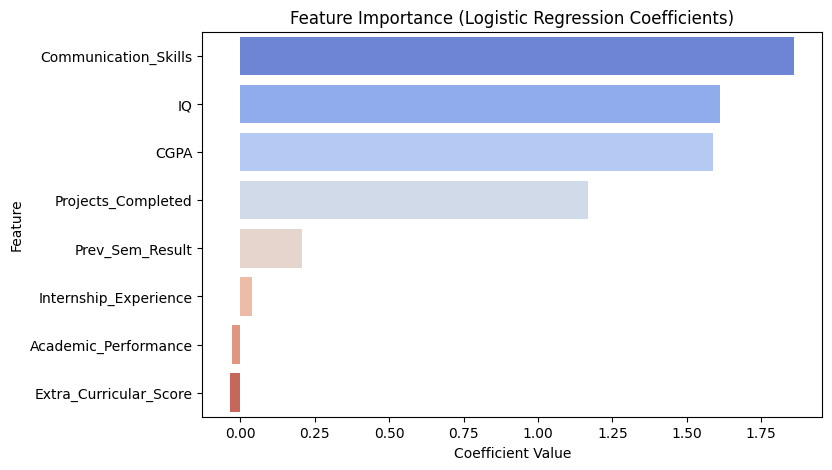

In [69]:
#Feature Importance

coef_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model_log.coef_[0]
}).sort_values(by='Coefficient', ascending=False)

plt.figure(figsize=(8,5))
sns.barplot(x='Coefficient', y='Feature', data=coef_df, palette='coolwarm')
plt.title("Feature Importance (Logistic Regression Coefficients)")
plt.xlabel("Coefficient Value")
plt.ylabel("Feature")
plt.show()

# Q3

**What student groups can be formed based on IQ, Prev_Sem_Result, and CGPA, and how do these groups differ?**

**Variables Involved:** *IQ (continuous), Prev_Sem_Result (continuous), CGPA (continuous)*


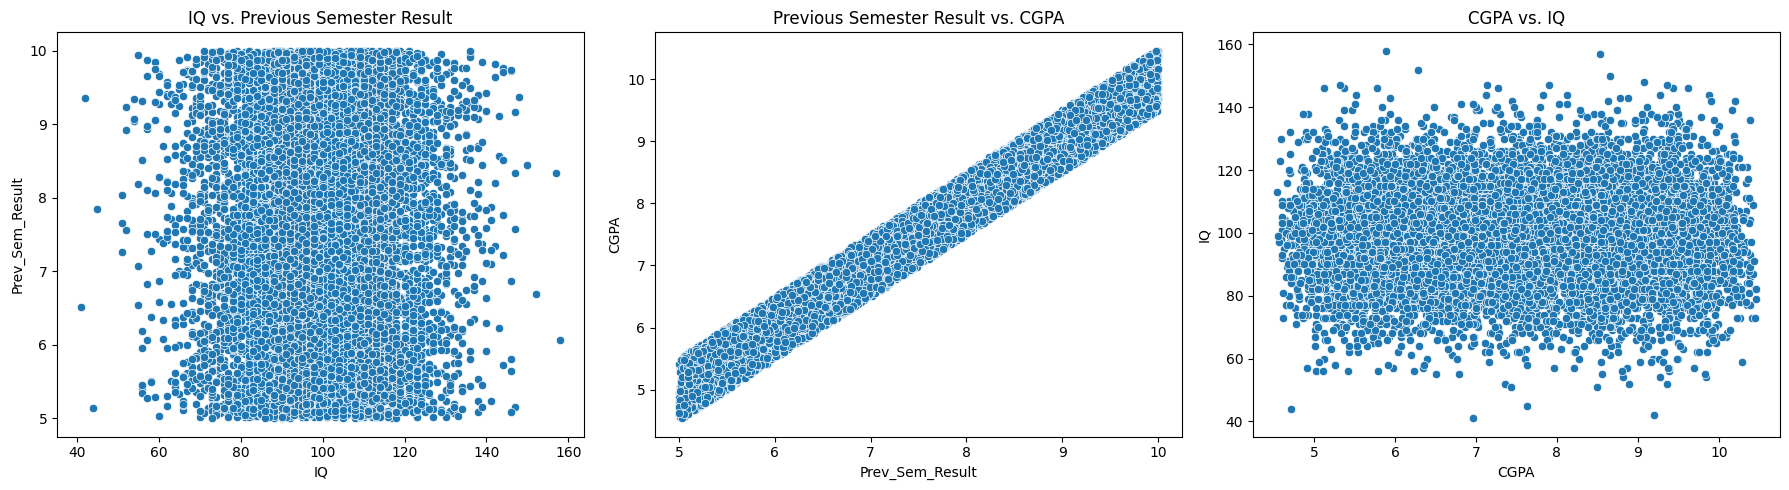

In [70]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select the features for these scatterplots
features_for_plots = ['IQ', 'Prev_Sem_Result', 'CGPA']

# Create a figure with 3 subplots
plt.figure(figsize=(18, 5))

# Plot 1: IQ vs. Prev_Sem_Result
plt.subplot(1, 3, 1) # 1 row, 3 columns, 1st plot
sns.scatterplot(data=data_encoded, x='IQ', y='Prev_Sem_Result')
plt.title('IQ vs. Previous Semester Result')

# Plot 2: Prev_Sem_Result vs. CGPA
plt.subplot(1, 3, 2) # 1 row, 3 columns, 2nd plot
sns.scatterplot(data=data_encoded, x='Prev_Sem_Result', y='CGPA')
plt.title('Previous Semester Result vs. CGPA')

# Plot 3: CGPA vs. IQ
plt.subplot(1, 3, 3) # 1 row, 3 columns, 3rd plot
sns.scatterplot(data=data_encoded, x='CGPA', y='IQ')
plt.title('CGPA vs. IQ')

plt.tight_layout()
plt.show()

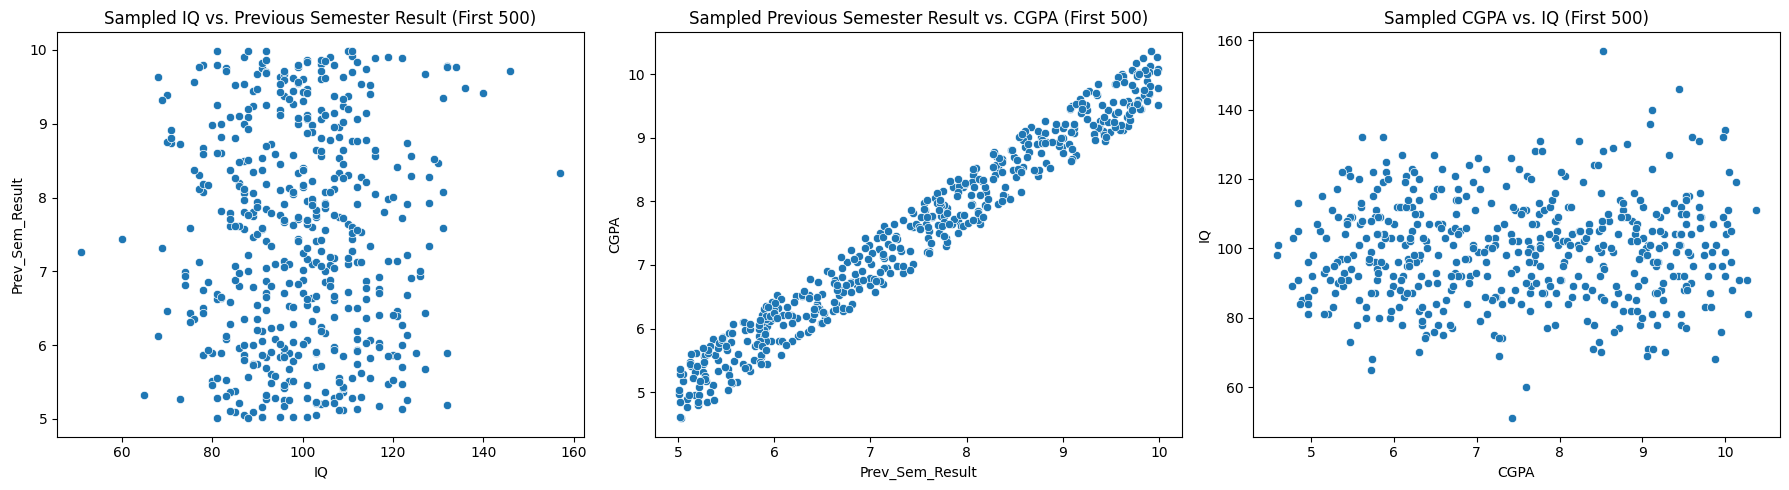

In [71]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select the features for these scatterplots
features_for_plots = ['IQ', 'Prev_Sem_Result', 'CGPA']

# Sample the first 500 points from the *unscaled* data
sampled_data_500 = data_encoded[features_for_plots].head(500)

# Create a figure with 3 subplots
plt.figure(figsize=(18, 5))

# Plot 1: IQ vs. Prev_Sem_Result
plt.subplot(1, 3, 1) # 1 row, 3 columns, 1st plot
sns.scatterplot(data=sampled_data_500, x='IQ', y='Prev_Sem_Result')
plt.title('Sampled IQ vs. Previous Semester Result (First 500)')

# Plot 2: Prev_Sem_Result vs. CGPA
plt.subplot(1, 3, 2) # 1 row, 3 columns, 2nd plot
sns.scatterplot(data=sampled_data_500, x='Prev_Sem_Result', y='CGPA')
plt.title('Sampled Previous Semester Result vs. CGPA (First 500)')

# Plot 3: CGPA vs. IQ
plt.subplot(1, 3, 3) # 1 row, 3 columns, 3rd plot
sns.scatterplot(data=sampled_data_500, x='CGPA', y='IQ')
plt.title('Sampled CGPA vs. IQ (First 500)')

plt.tight_layout()
plt.show()

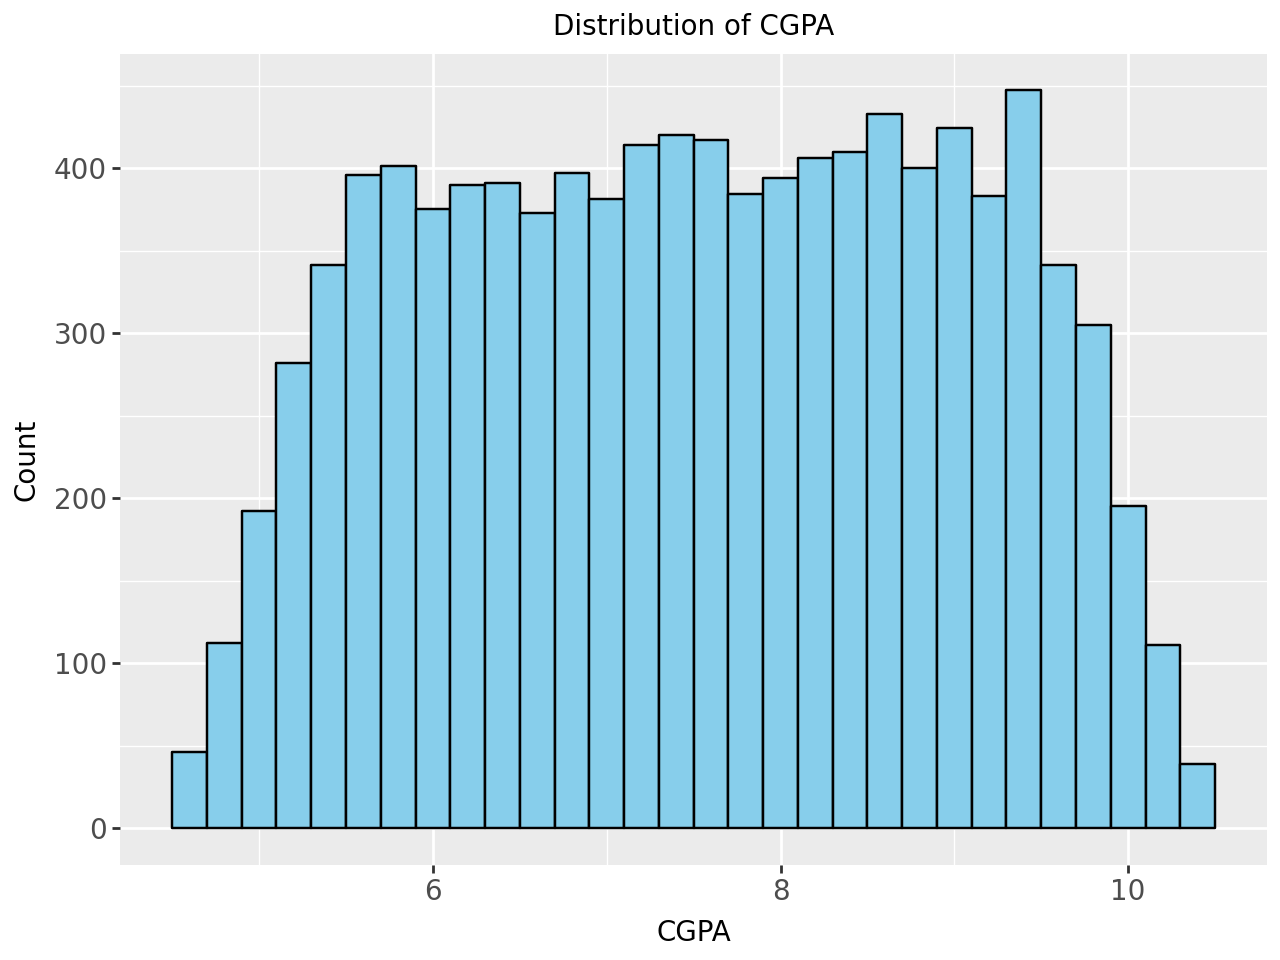

In [72]:
from plotnine import ggplot, aes, geom_histogram, labs, facet_wrap, theme, element_text
import pandas as pd

# Plotting using ggplot for CGPA only, directly from data_encoded
p = (ggplot(data_encoded, aes(x='CGPA'))
     + geom_histogram(binwidth=0.2, fill='skyblue', color='black') # Adjusted binwidth for CGPA
     + labs(title='Distribution of CGPA', x='CGPA', y='Count')
     + theme(text=element_text(size=10))
)

p

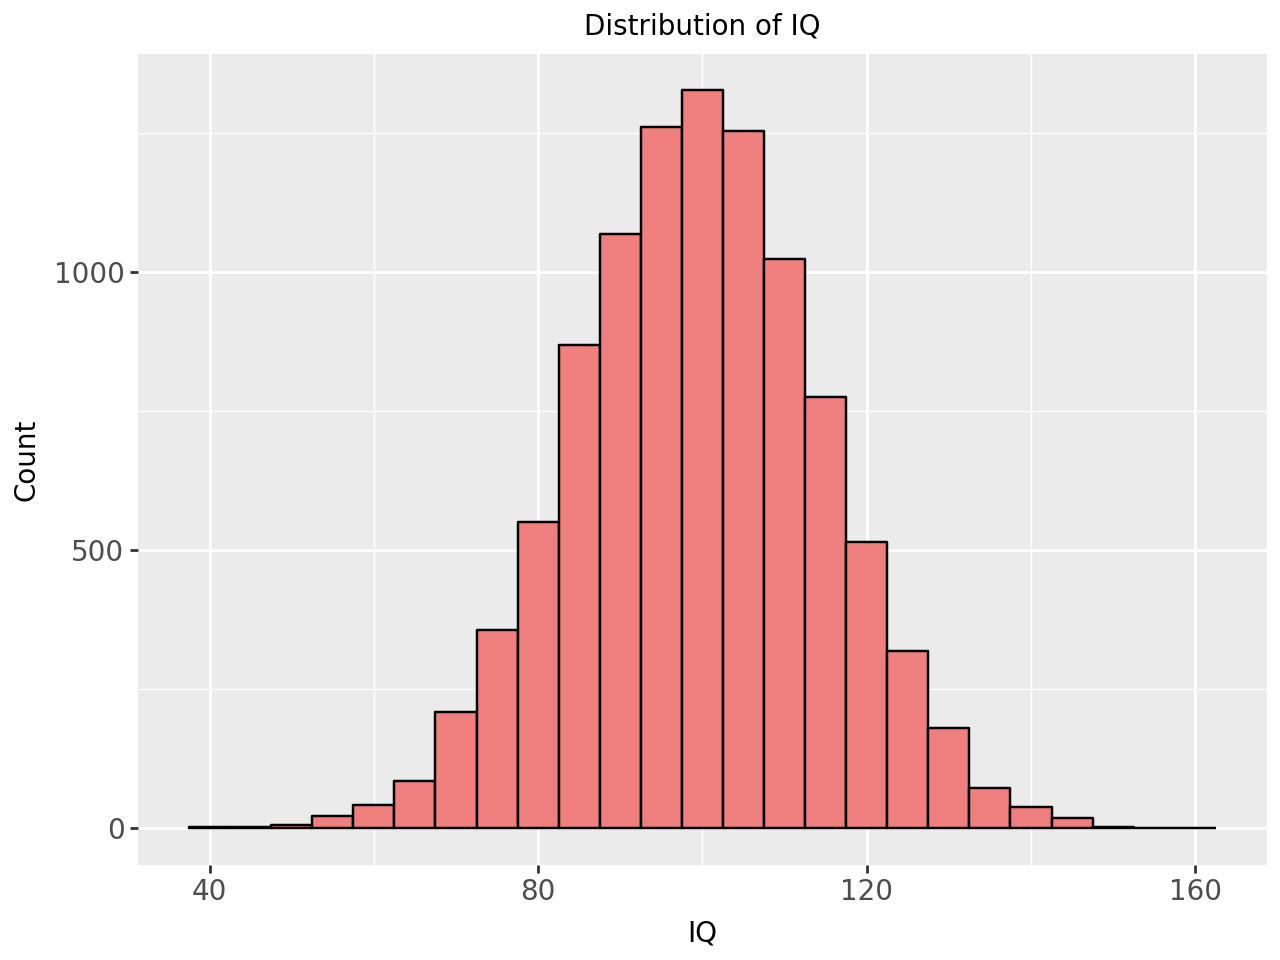

In [73]:
from plotnine import ggplot, aes, geom_histogram, labs, theme, element_text
import pandas as pd

# Create a histogram for IQ using ggplot
p = (ggplot(data_encoded, aes(x='IQ'))
     + geom_histogram(binwidth=5, fill='lightcoral', color='black') # Adjust binwidth as appropriate for IQ scores
     + labs(title='Distribution of IQ', x='IQ', y='Count')
     + theme(text=element_text(size=10))
)

p


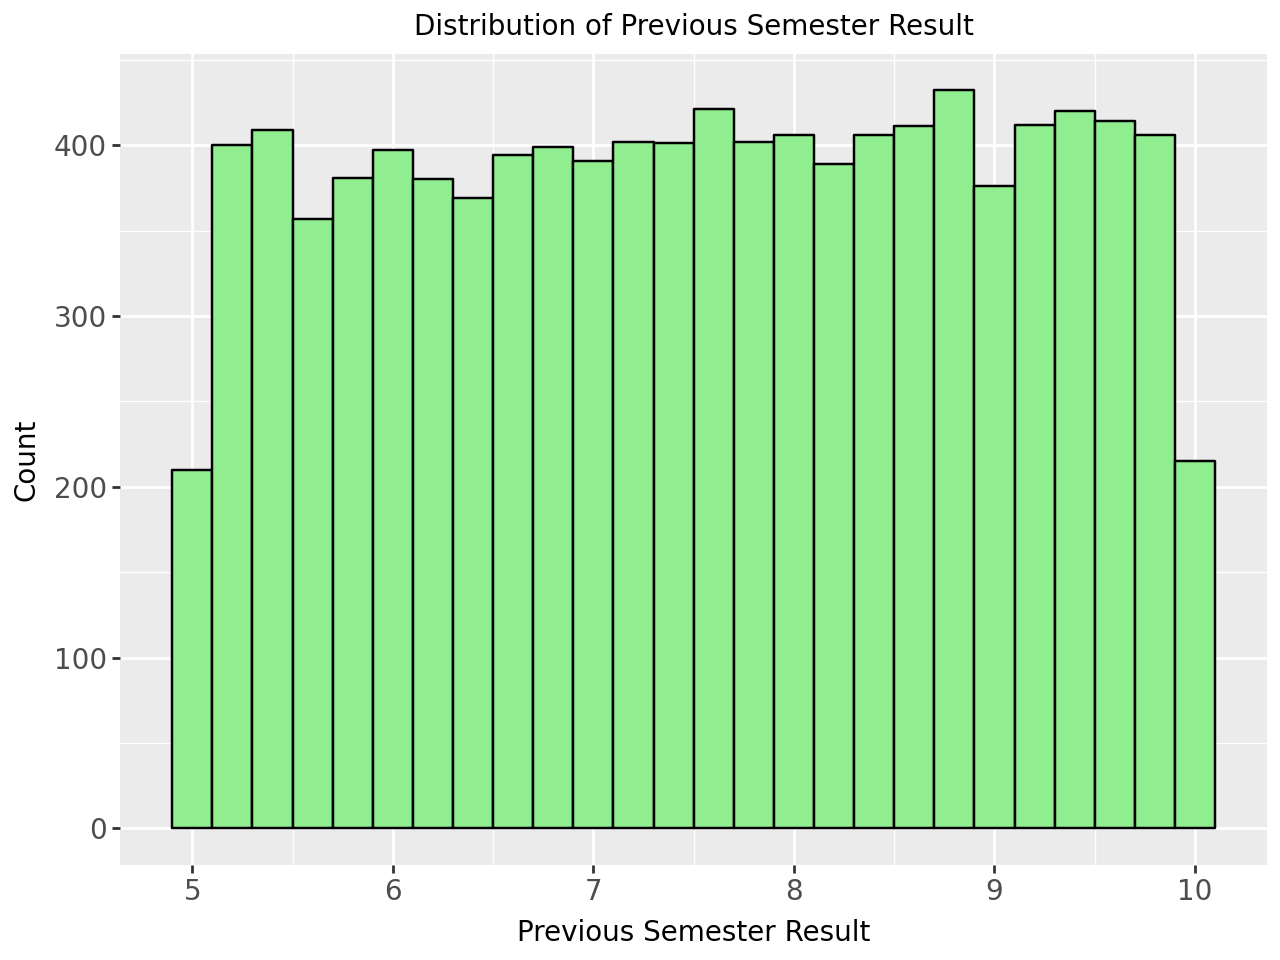

In [74]:
from plotnine import ggplot, aes, geom_histogram, labs, theme, element_text
import pandas as pd

# Create a histogram for Prev_Sem_Result using ggplot
p = (ggplot(data_encoded, aes(x='Prev_Sem_Result'))
     + geom_histogram(binwidth=0.2, fill='lightgreen', color='black') # Adjusted binwidth for Prev_Sem_Result
     + labs(title='Distribution of Previous Semester Result', x='Previous Semester Result', y='Count')
     + theme(text=element_text(size=10))
)

p


In [75]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

# 1. Select the 'IQ', 'Prev_Sem_Result', and 'CGPA' features
features_for_gmm = ['IQ', 'Prev_Sem_Result', 'CGPA']
X_q3_gmm = data_encoded[features_for_gmm]

# 2. Initialize a StandardScaler object
scaler_q3 = StandardScaler()

# 3. Fit the StandardScaler to X_q3_gmm and then transform the data
X_q3_gmm_scaled_array = scaler_q3.fit_transform(X_q3_gmm)

# Store the scaled features in a new DataFrame named X_q3_gmm_scaled, preserving column names
X_q3_gmm_scaled = pd.DataFrame(X_q3_gmm_scaled_array, columns=features_for_gmm)

print("Features selected and scaled for GMM clustering.")
print("X_q3_gmm_scaled head:")
display(X_q3_gmm_scaled.head())

Features selected and scaled for GMM clustering.
X_q3_gmm_scaled head:


,IQ,Prev_Sem_Result,CGPA
0,0.500135,-0.639521,-0.851919
1,-0.164214,-1.392572,-1.470939
2,0.633004,-1.503111,-1.158028
3,1.496657,-1.427115,-1.212447
4,-0.230648,0.258612,0.107220


BIC scores calculated for different numbers of components.


,n_components,BIC
0,1,52542.14
1,2,51157.26
2,3,51262.99
3,4,50481.58
4,5,50287.38
5,6,50867.81
6,7,50249.23
7,8,50861.69
8,9,50719.40
9,10,50386.78


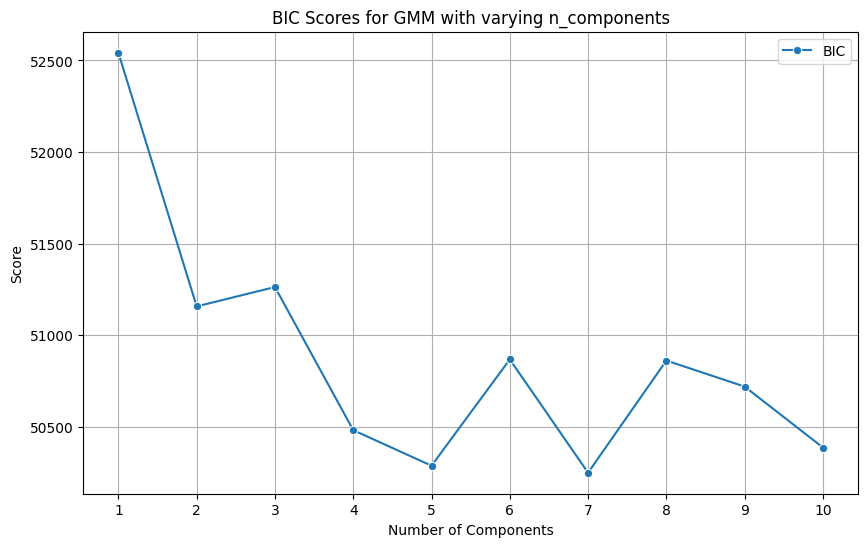

In [76]:
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 1. Initialize empty lists to store BIC scores
bic_scores = []
n_components_range = range(1, 11) # From 1 to 10 components

# 2. Iterate through a range of n_components
for n_components in n_components_range:
    # 3. For each n_components, instantiate a GaussianMixture model
    gmm = GaussianMixture(n_components=n_components, random_state=42)

    # 4. Fit the GaussianMixture model to the X_q3_gmm_scaled DataFrame
    gmm.fit(X_q3_gmm_scaled)

    # 5. Calculate the BIC scores for the fitted model
    bic_scores.append(gmm.bic(X_q3_gmm_scaled))

# 6. Create a DataFrame to store the n_components and BIC scores
aic_bic_df = pd.DataFrame({
    'n_components': n_components_range,
    'BIC': bic_scores
})

print("BIC scores calculated for different numbers of components.")
display(aic_bic_df.round(2))

# 7. and 8. Plot the BIC scores only
plt.figure(figsize=(10, 6))
sns.lineplot(x='n_components', y='BIC', data=aic_bic_df, marker='o', label='BIC')
plt.title('BIC Scores for GMM with varying n_components')
plt.xlabel('Number of Components')
plt.ylabel('Score')
plt.xticks(list(n_components_range))
plt.legend()
plt.grid(True)
plt.show()

In [77]:
from sklearn.mixture import GaussianMixture

# Optimal number of clusters identified from AIC/BIC plot (minimum BIC)
optimal_k = 5

# Instantiate and fit GMM with the optimal_k
gmm_optimal = GaussianMixture(n_components=optimal_k, random_state=42)
gmm_optimal.fit(X_q3_gmm_scaled)

# Assign cluster labels to data_encoded
data_encoded['Cluster_Q3_GMM_Elbow'] = gmm_optimal.predict(X_q3_gmm_scaled)

print(f"GMM fitted with optimal_k = {optimal_k} clusters.")
print("Cluster distribution for Q3 (IQ, Prev_Sem_Result, CGPA) using optimal k:")
display(data_encoded['Cluster_Q3_GMM_Elbow'].value_counts())

print("Data with assigned clusters using optimal k:")
display(data_encoded[features_for_gmm + ['Cluster_Q3_GMM_Elbow']].head())

GMM fitted with optimal_k = 5 clusters.
Cluster distribution for Q3 (IQ, Prev_Sem_Result, CGPA) using optimal k:


,count
Cluster_Q3_GMM_Elbow,
1,2795
0,2150
4,1851
3,1694
2,1510


Data with assigned clusters using optimal k:


,IQ,Prev_Sem_Result,CGPA,Cluster_Q3_GMM_Elbow
0,107,6.61,6.28,3
1,97,5.52,5.37,4
2,109,5.36,5.83,4
3,122,5.47,5.75,4
4,96,7.91,7.69,1


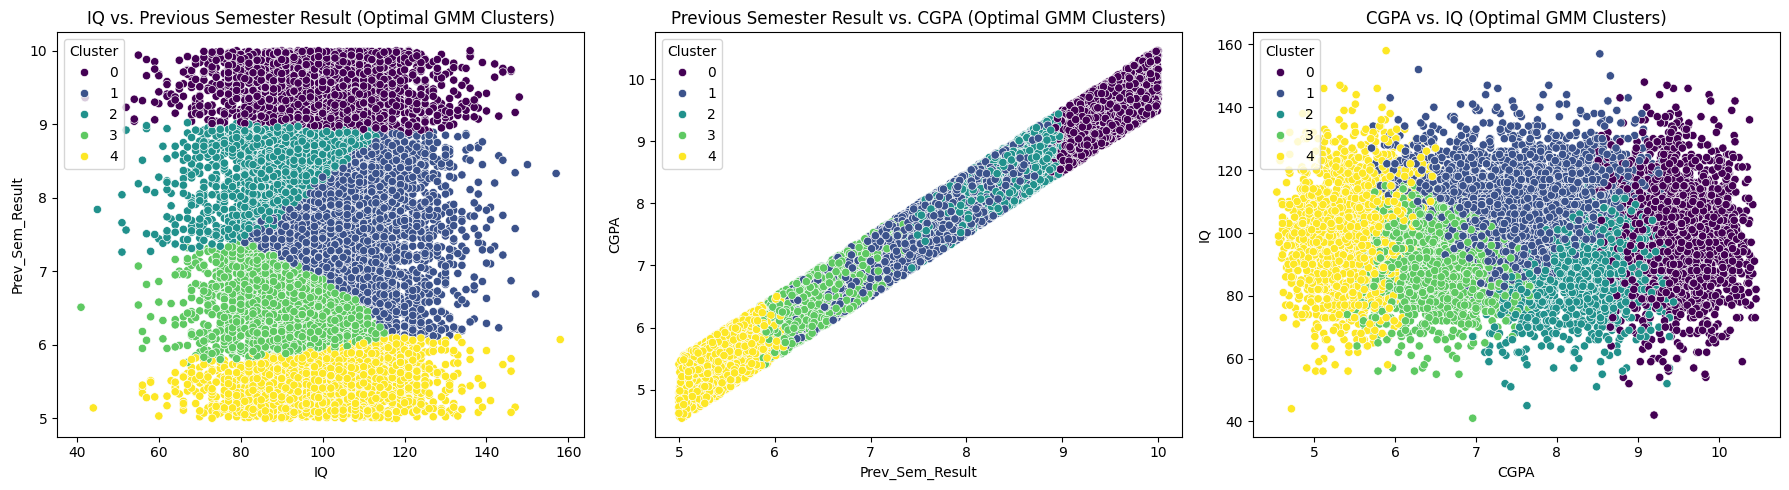

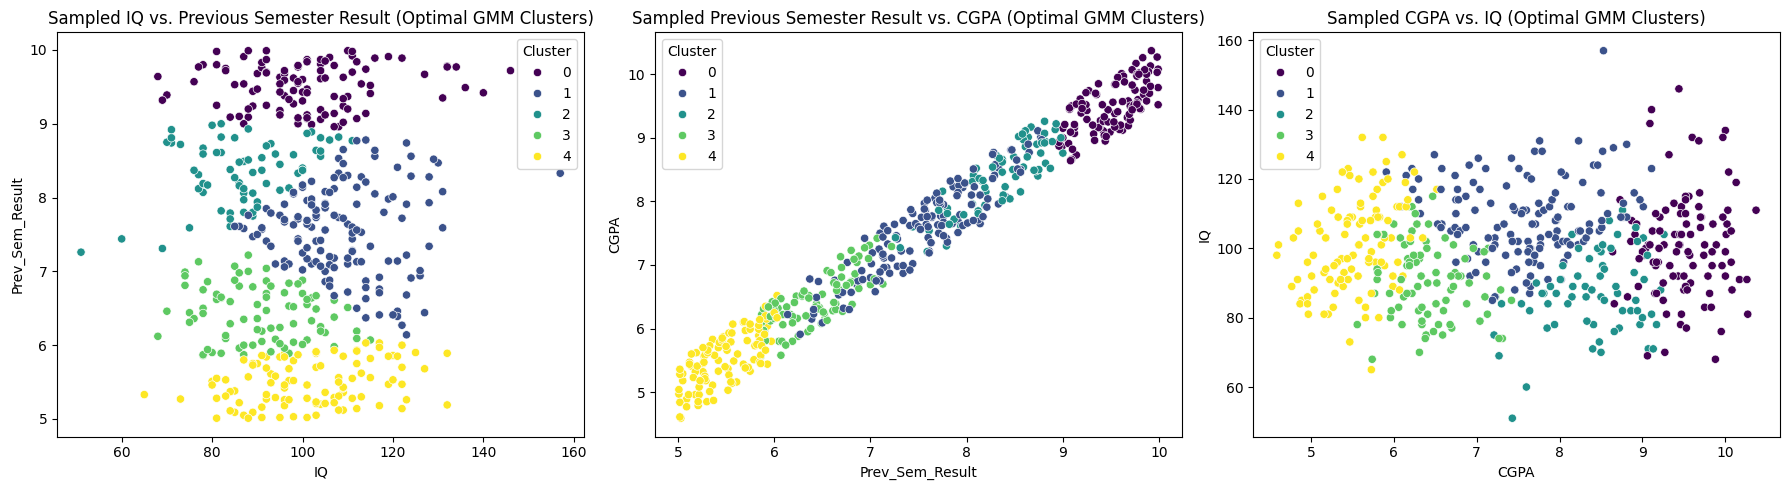

In [78]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Define the features for plotting
features_for_gmm_plots = ['IQ', 'Prev_Sem_Result', 'CGPA']

# --- Full Dataset Plots ---
plt.figure(figsize=(18, 5))

# Plot 1: IQ vs. Prev_Sem_Result (Clustered, Full Data)
plt.subplot(1, 3, 1)
sns.scatterplot(data=data_encoded, x='IQ', y='Prev_Sem_Result', hue='Cluster_Q3_GMM_Elbow', palette='viridis', legend='full')
plt.title('IQ vs. Previous Semester Result (Optimal GMM Clusters)')
plt.legend(title='Cluster')

# Plot 2: Prev_Sem_Result vs. CGPA (Clustered, Full Data)
plt.subplot(1, 3, 2)
sns.scatterplot(data=data_encoded, x='Prev_Sem_Result', y='CGPA', hue='Cluster_Q3_GMM_Elbow', palette='viridis', legend='full')
plt.title('Previous Semester Result vs. CGPA (Optimal GMM Clusters)')
plt.legend(title='Cluster')

# Plot 3: CGPA vs. IQ (Clustered, Full Data)
plt.subplot(1, 3, 3)
sns.scatterplot(data=data_encoded, x='CGPA', y='IQ', hue='Cluster_Q3_GMM_Elbow', palette='viridis', legend='full')
plt.title('CGPA vs. IQ (Optimal GMM Clusters)')
plt.legend(title='Cluster')

plt.tight_layout()
plt.show()


# --- Sampled Dataset Plots (first 500 rows) ---
sampled_data_gmm_clustered = data_encoded.head(500)

plt.figure(figsize=(18, 5))

# Plot 1: IQ vs. Prev_Sem_Result (Clustered, Sampled Data)
plt.subplot(1, 3, 1)
sns.scatterplot(data=sampled_data_gmm_clustered, x='IQ', y='Prev_Sem_Result', hue='Cluster_Q3_GMM_Elbow', palette='viridis', legend='full')
plt.title('Sampled IQ vs. Previous Semester Result (Optimal GMM Clusters)')
plt.legend(title='Cluster')

# Plot 2: Prev_Sem_Result vs. CGPA (Clustered, Sampled Data)
plt.subplot(1, 3, 2)
sns.scatterplot(data=sampled_data_gmm_clustered, x='Prev_Sem_Result', y='CGPA', hue='Cluster_Q3_GMM_Elbow', palette='viridis', legend='full')
plt.title('Sampled Previous Semester Result vs. CGPA (Optimal GMM Clusters)')
plt.legend(title='Cluster')

# Plot 3: CGPA vs. IQ (Clustered, Sampled Data)
plt.subplot(1, 3, 3)
sns.scatterplot(data=sampled_data_gmm_clustered, x='CGPA', y='IQ', hue='Cluster_Q3_GMM_Elbow', palette='viridis', legend='full')
plt.title('Sampled CGPA vs. IQ (Optimal GMM Clusters)')
plt.legend(title='Cluster')

plt.tight_layout()
plt.show()

**Reasoning**:
Now that the new clusters are visualized, I will summarize their characteristics by calculating the mean values of 'IQ', 'Prev_Sem_Result', and 'CGPA' for each cluster and then visualize these means using a bar chart, as specified in the task.



Mean values of features per cluster for optimal k (Q3):


,IQ,Prev_Sem_Result,CGPA
Cluster_Q3_GMM_Elbow,,,
0,99.584651,9.486386,9.475209
1,109.535242,7.571821,7.561574
2,88.515894,8.396881,8.402477
3,91.050177,6.485525,6.491222
4,100.789843,5.473793,5.474673


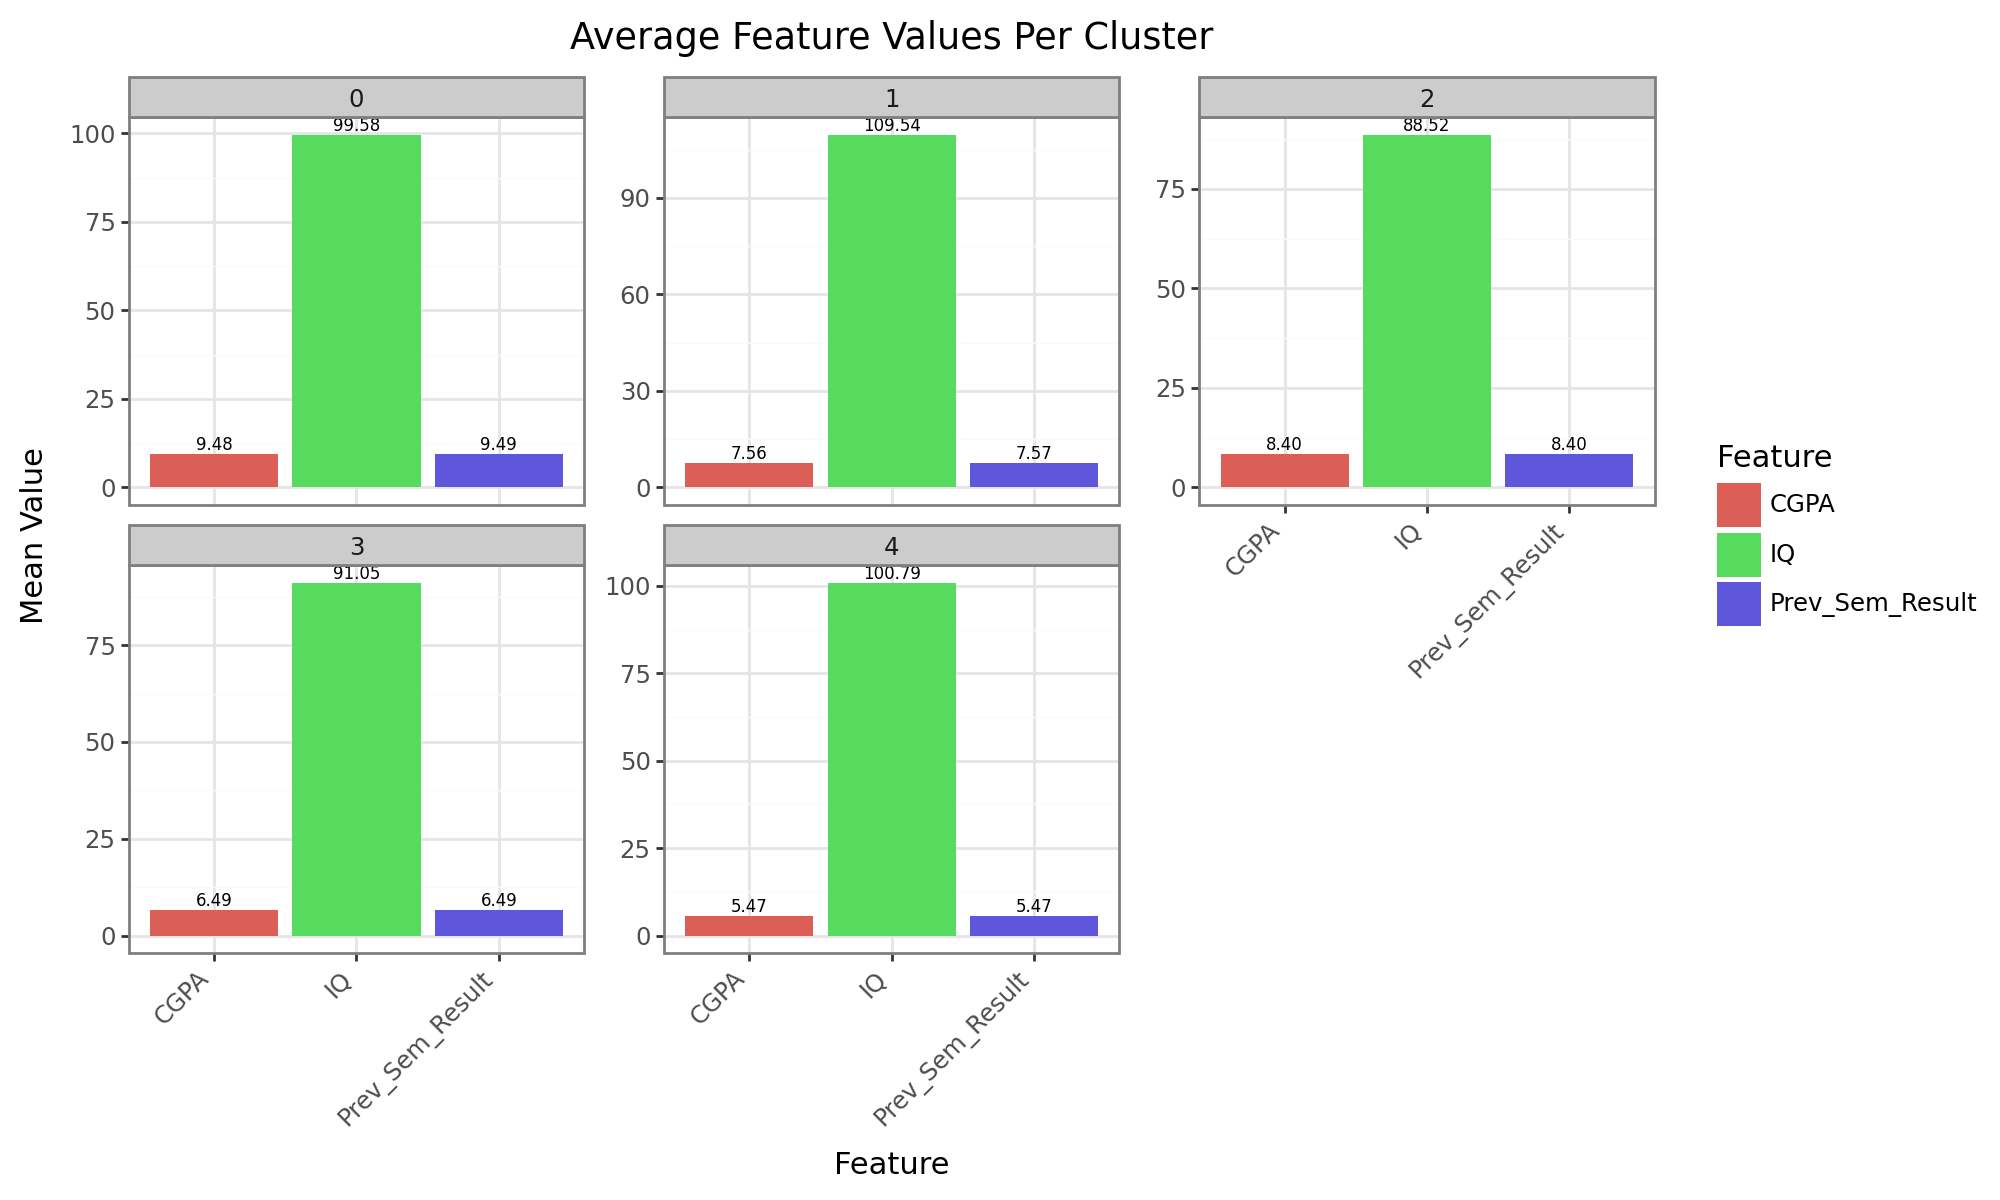

In [79]:
from plotnine import ggplot, aes, geom_bar, labs, facet_wrap, theme, element_text, geom_text
import pandas as pd

# Analyze cluster characteristics by calculating mean values for each feature within each cluster
features_for_gmm_summary = ['IQ', 'Prev_Sem_Result', 'CGPA']
cluster_summary_gmm_elbow = data_encoded.groupby('Cluster_Q3_GMM_Elbow')[features_for_gmm_summary].mean()
print("Mean values of features per cluster for optimal k (Q3):")
display(cluster_summary_gmm_elbow)

# Reshape data for ggplot (long format) for visualization
cluster_summary_gmm_elbow_melted = cluster_summary_gmm_elbow.reset_index().melt(
    id_vars='Cluster_Q3_GMM_Elbow',
    var_name='Feature',
    value_name='Mean_Value'
)

# Visualize cluster means using ggplot
p = (ggplot(cluster_summary_gmm_elbow_melted, aes(x='Feature', y='Mean_Value', fill='Feature'))
     + geom_bar(stat='identity', position='dodge')
     + geom_text(aes(label='Mean_Value'), # Add text labels
                 va='bottom', size=6, format_string='{:.2f}') # Position and format the labels
     + facet_wrap('~Cluster_Q3_GMM_Elbow', scales='free_y') # Facet by cluster
     + labs(title='Average Feature Values Per Cluster',
            x='Feature',
            y='Mean Value',
            fill='Feature') + theme_bw()
     + theme(axis_text_x=element_text(rotation=45, hjust=1), # Rotate x-axis labels
             figure_size=(10, 6))
)
p


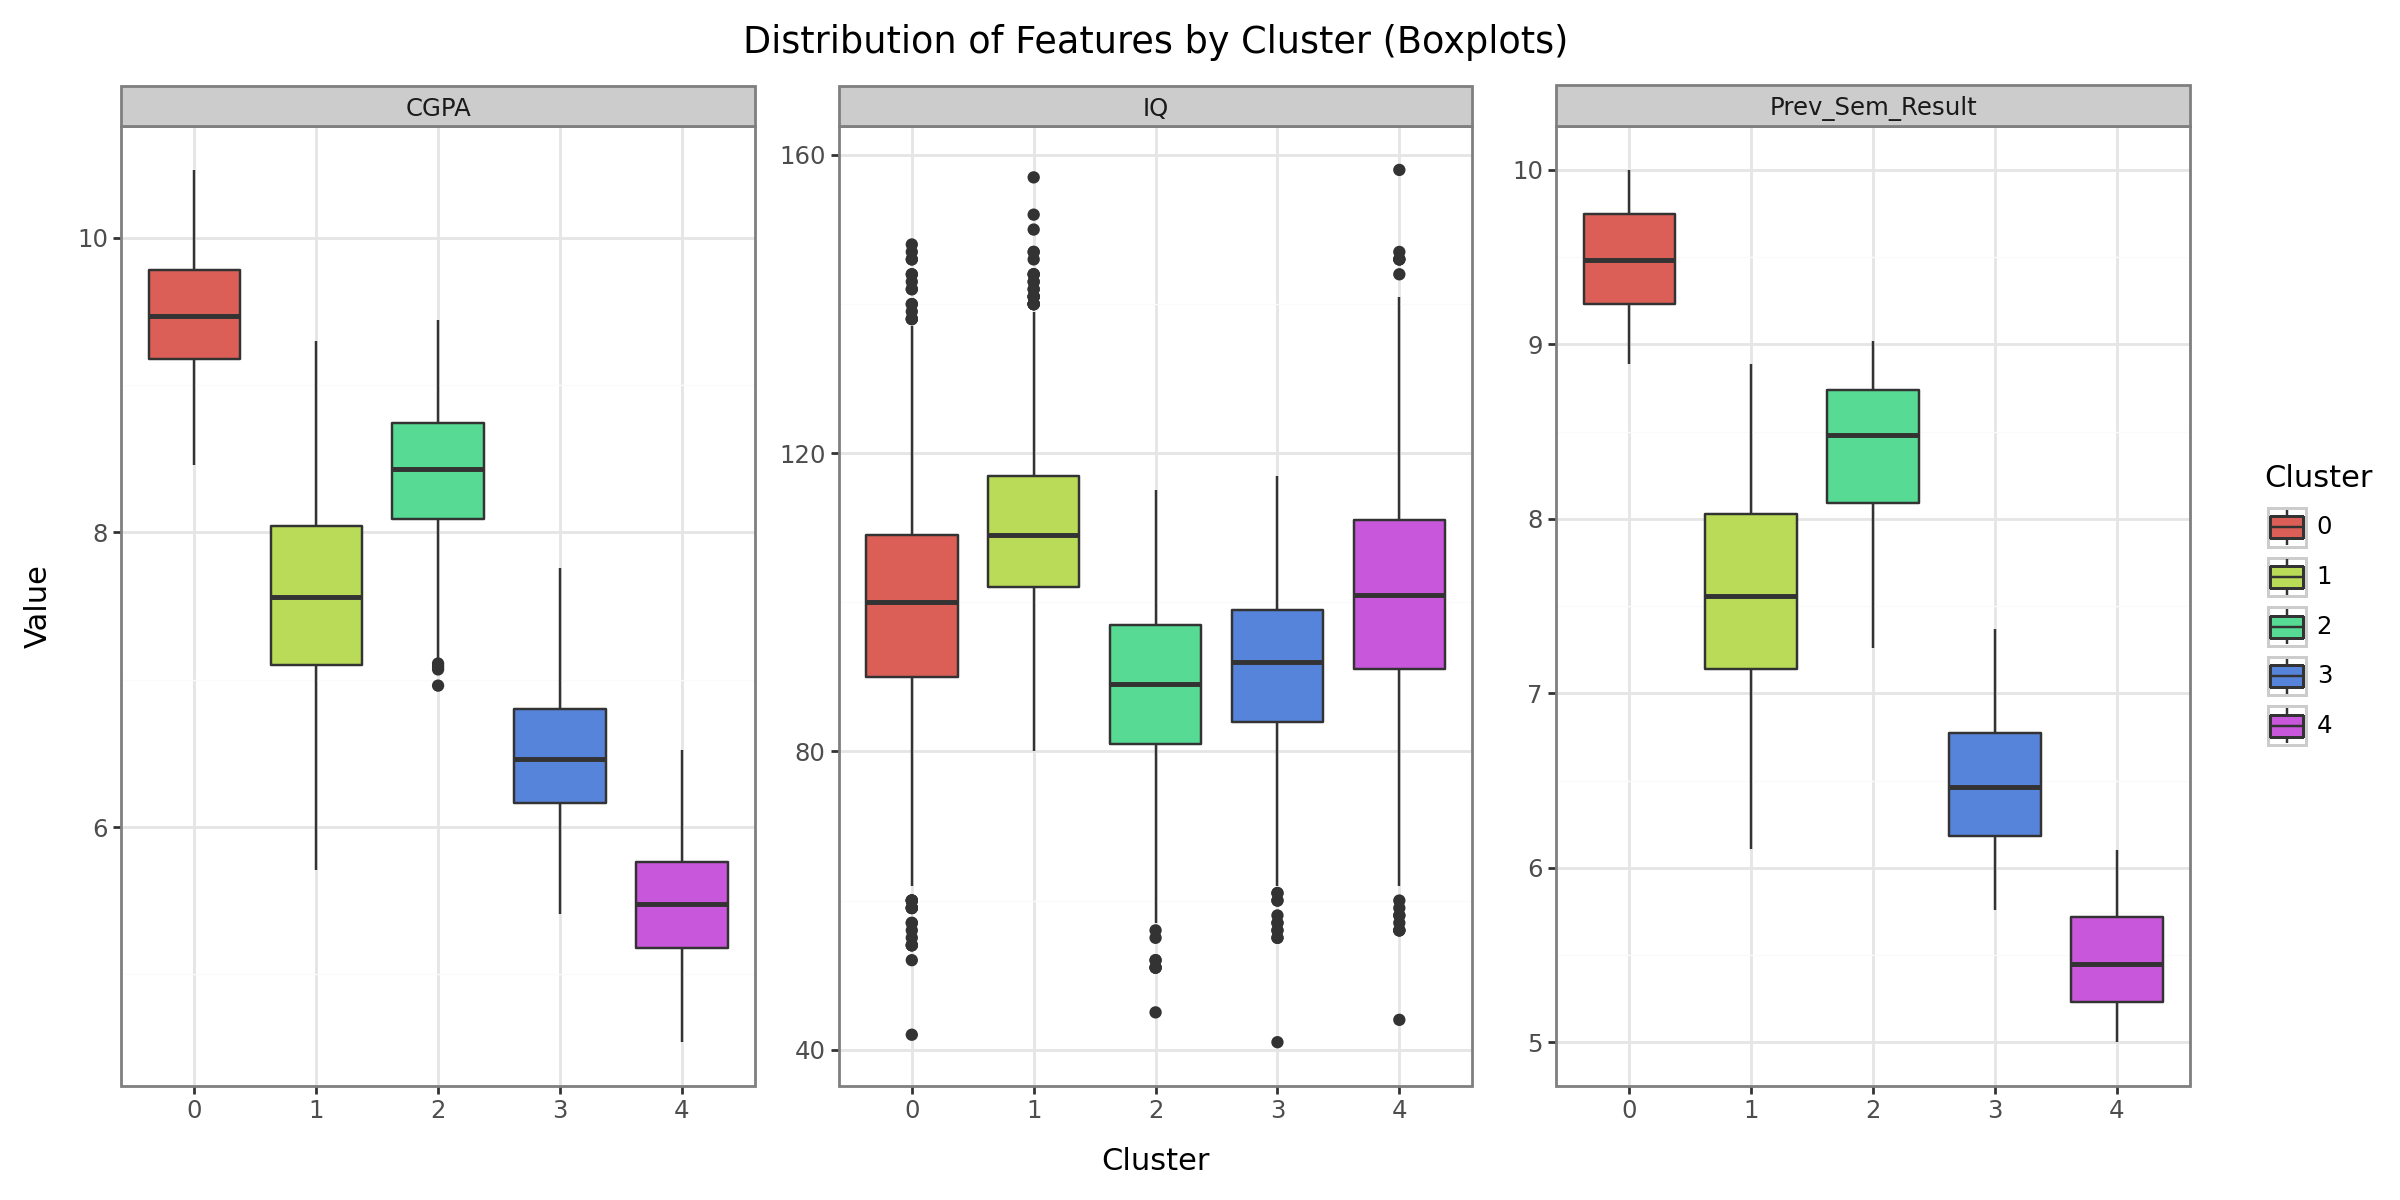

In [80]:
from plotnine import ggplot, aes, geom_boxplot, labs, facet_wrap, theme, element_text
import pandas as pd

# Select the features and the cluster column
features_for_boxplot = ['IQ', 'Prev_Sem_Result', 'CGPA', 'Cluster_Q3_GMM_Elbow']
data_for_boxplot = data_encoded[features_for_boxplot]

# Melt the DataFrame to long format for faceting by feature
data_melted = data_for_boxplot.melt(
    id_vars=['Cluster_Q3_GMM_Elbow'],
    var_name='Feature',
    value_name='Value'
)

# Plotting with ggplot
p = (ggplot(data_melted, aes(x='factor(Cluster_Q3_GMM_Elbow)', y='Value', fill='factor(Cluster_Q3_GMM_Elbow)'))
     + geom_boxplot()
     + facet_wrap('~Feature', scales='free_y', nrow=1) # Separate plot for each feature
     + labs(
         title='Distribution of Features by Cluster (Boxplots)',
         x='Cluster',
         y='Value',
         fill='Cluster'
     ) + theme_bw()
     + theme(axis_text_x=element_text(rotation=0),
             figure_size=(12, 6))
)
p

# Q4

**Can we use PCA to simplify the features when predicting Internship_Experience, and how many components do we need to keep the model’s accuracy similar to using all features?**

In [81]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# 1. Define the feature matrix X and target variable y
X = data_encoded[['IQ', 'Prev_Sem_Result', 'CGPA', 'Academic_Performance',
                  'Extra_Curricular_Score', 'Communication_Skills', 'Projects_Completed', 'Placement']]
y = data_encoded['Internship_Experience']

# 3. Identify the continuous features
continuous_features_q4 = ['IQ', 'Prev_Sem_Result', 'CGPA', 'Academic_Performance',
                          'Extra_Curricular_Score', 'Communication_Skills', 'Projects_Completed']

# Create a copy of X to scale, to avoid modifying the original DataFrame and for clarity
X_scaled_q4 = X.copy()

# 4. Instantiate a StandardScaler object
scaler_q4 = StandardScaler()

# 5. Apply the StandardScaler to the continuous features in X
X_scaled_q4[continuous_features_q4] = scaler_q4.fit_transform(X_scaled_q4[continuous_features_q4])

# 6. Split the data into training and testing sets with stratified sampling
X_train_q4, X_test_q4, y_train_q4, y_test_q4 = train_test_split(
    X_scaled_q4, y, test_size=0.2, random_state=42, stratify=y
)

print("Data prepared for Q4 PCA analysis.")
print(f"X_train_q4 shape: {X_train_q4.shape}")
print(f"y_train_q4 shape: {y_train_q4.shape}")
print(f"X_test_q4 shape: {X_test_q4.shape}")
print(f"y_test_q4 shape: {y_test_q4.shape}")

Data prepared for Q4 PCA analysis.
X_train_q4 shape: (8000, 8)
y_train_q4 shape: (8000,)
X_test_q4 shape: (2000, 8)
y_test_q4 shape: (2000,)


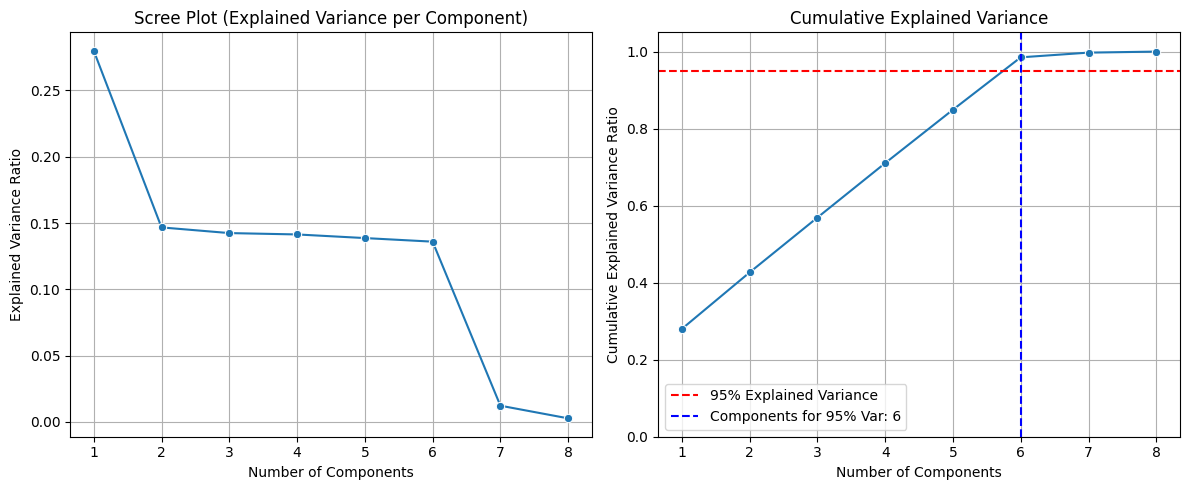

Explained variance ratio for each component:
[0.27996931 0.1466981  0.14241807 0.1413901  0.13865606 0.13595302
 0.01222874 0.00268659]
Cumulative explained variance:
[0.27996931 0.42666741 0.56908549 0.71047559 0.84913165 0.98508467
 0.99731341 1.        ]


In [82]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Initialize PCA
pca = PCA()

# Fit PCA on the scaled training features
pca.fit(X_train_q4)

# Calculate cumulative explained variance
cum_explained_variance = np.cumsum(pca.explained_variance_ratio_)

# Create a figure with two subplots for visualization
plt.figure(figsize=(12, 5))

# Scree Plot
plt.subplot(1, 2, 1)
sns.lineplot(x=range(1, len(pca.explained_variance_ratio_) + 1), y=pca.explained_variance_ratio_, marker='o')
plt.title('Scree Plot (Explained Variance per Component)')
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance Ratio')
plt.grid(True)

# Cumulative Explained Variance Plot
plt.subplot(1, 2, 2)
sns.lineplot(x=range(1, len(cum_explained_variance) + 1), y=cum_explained_variance, marker='o')
plt.title('Cumulative Explained Variance')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.axhline(y=0.95, color='r', linestyle='--', label='95% Explained Variance')
plt.axvline(x=np.argmax(cum_explained_variance >= 0.95) + 1, color='b', linestyle='--', label=f'Components for 95% Var: {np.argmax(cum_explained_variance >= 0.95) + 1}')
plt.grid(True)
plt.legend()
plt.ylim(0.0, 1.05) # Set y-axis to start at 0.0 and go slightly above 1.0

plt.tight_layout()
plt.show()

print("Explained variance ratio for each component:")
print(pca.explained_variance_ratio_)
print("Cumulative explained variance:")
print(cum_explained_variance)

In [83]:
from sklearn.decomposition import PCA

# Initialize PCA with 6 components (as determined from the previous step)
pca_final = PCA(n_components=6)

# Fit PCA on the scaled training data and transform both training and testing data
X_train_pca = pca_final.fit_transform(X_train_q4)
X_test_pca = pca_final.transform(X_test_q4)

print(f"Original X_train_q4 shape: {X_train_q4.shape}")
print(f"Transformed X_train_pca shape: {X_train_pca.shape}")
print(f"Original X_test_q4 shape: {X_test_q4.shape}")
print(f"Transformed X_test_pca shape: {X_test_pca.shape}")

# Also create a baseline model without PCA for comparison
# For the baseline, we use the already scaled X_train_q4 and X_test_q4


Original X_train_q4 shape: (8000, 8)
Transformed X_train_pca shape: (8000, 6)
Original X_test_q4 shape: (2000, 8)
Transformed X_test_pca shape: (2000, 6)


In [84]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Train Baseline Logistic Regression Model (without PCA)
# Use the already scaled X_train_q4 and y_train_q4
model_baseline_q4 = LogisticRegression(random_state=42, solver='liblinear')
model_baseline_q4.fit(X_train_q4, y_train_q4)

# Make predictions on the test set
y_pred_baseline_q4 = model_baseline_q4.predict(X_test_q4)

# Evaluate baseline model performance
accuracy_baseline_q4 = accuracy_score(y_test_q4, y_pred_baseline_q4)
report_baseline_q4 = classification_report(y_test_q4, y_pred_baseline_q4, output_dict=True)

print(f"Baseline Model Accuracy (without PCA): {accuracy_baseline_q4:.4f}")
print("Baseline Model Classification Report (without PCA):\n")
print(classification_report(y_test_q4, y_pred_baseline_q4))


Baseline Model Accuracy (without PCA): 0.6035
Baseline Model Classification Report (without PCA):

              precision    recall  f1-score   support

           0       0.60      1.00      0.75      1207
           1       0.00      0.00      0.00       793

    accuracy                           0.60      2000
   macro avg       0.30      0.50      0.38      2000
weighted avg       0.36      0.60      0.45      2000



In [85]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Train Logistic Regression Model with PCA
model_pca_q4 = LogisticRegression(random_state=42, solver='liblinear')
model_pca_q4.fit(X_train_pca, y_train_q4)

# Make predictions on the PCA-transformed test set
y_pred_pca_q4 = model_pca_q4.predict(X_test_pca)

# Evaluate PCA model performance
accuracy_pca_q4 = accuracy_score(y_test_q4, y_pred_pca_q4)
report_pca_q4 = classification_report(y_test_q4, y_pred_pca_q4, output_dict=True)

print(f"PCA Model Accuracy (with 6 components): {accuracy_pca_q4:.4f}")
print("PCA Model Classification Report (with 6 components):\n")
print(classification_report(y_test_q4, y_pred_pca_q4))

# Store metrics for comparison
accuracy_results_q4 = {
    'Baseline': accuracy_baseline_q4,
    'PCA (6 components)': accuracy_pca_q4
}

report_results_q4 = {
    'Baseline': report_baseline_q4,
    'PCA (6 components)': report_pca_q4
}

print("\nComparison of Accuracies:")
for model, acc in accuracy_results_q4.items():
    print(f"{model}: {acc:.4f}")


PCA Model Accuracy (with 6 components): 0.6035
PCA Model Classification Report (with 6 components):

              precision    recall  f1-score   support

           0       0.60      1.00      0.75      1207
           1       0.00      0.00      0.00       793

    accuracy                           0.60      2000
   macro avg       0.30      0.50      0.38      2000
weighted avg       0.36      0.60      0.45      2000


Comparison of Accuracies:
Baseline: 0.6035
PCA (6 components): 0.6035


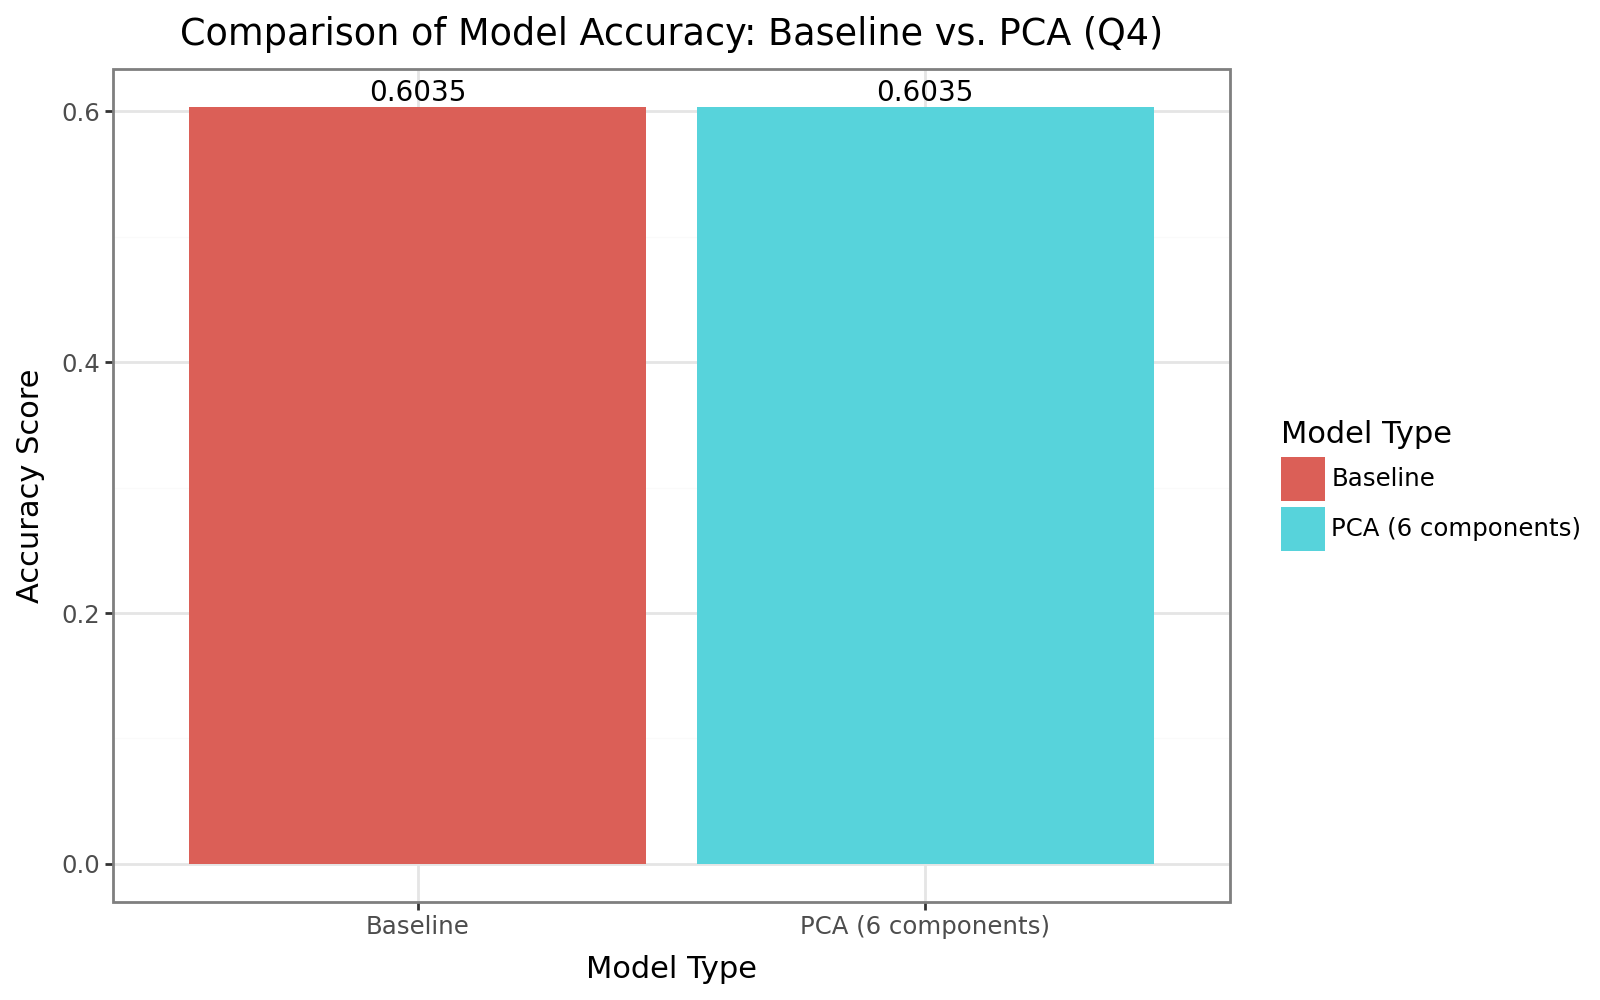

In [86]:
from plotnine import ggplot, aes, geom_bar, labs, theme, element_text, geom_text, theme_bw
import pandas as pd

# Create a DataFrame from accuracy_results_q4 for ggplot
accuracy_df = pd.DataFrame({
    'Model Type': list(accuracy_results_q4.keys()),
    'Accuracy Score': list(accuracy_results_q4.values())
})

# Create a bar plot to compare the accuracies using ggplot
p = (ggplot(accuracy_df, aes(x='Model Type', y='Accuracy Score', fill='Model Type'))
     + geom_bar(stat='identity')
     + geom_text(aes(label='Accuracy Score'), # Add text labels
                 va='bottom', size=10, format_string='{:.4f}') # Position and format the labels
     + labs(title='Comparison of Model Accuracy: Baseline vs. PCA (Q4)',
            x='Model Type',
            y='Accuracy Score')
     + theme_bw() # Apply theme_bw for a clearer background
     + theme(axis_text_x=element_text(rotation=0, hjust=0.5),
             figure_size=(8, 5)) # Set figure size for better readability
    )

p


In [87]:
import pandas as pd

# Correctly define the feature names used for PCA by using the columns from X_train_q4
# X_train_q4 is the scaled training data that pca_final was fitted on.
original_features_q4 = X_train_q4.columns

# Get the principal components (loadings)
components_df = pd.DataFrame(pca_final.components_, columns=original_features_q4)

# Display the coefficients for the first 6 components
print("Coefficients (Loadings) for the first 6 Principal Components (with corrected feature names):")
display(components_df.head(6))

Coefficients (Loadings) for the first 6 Principal Components (with corrected feature names):


,IQ,Prev_Sem_Result,CGPA,Academic_Performance,Extra_Curricular_Score,Communication_Skills,Projects_Completed,Placement
0,0.016664,0.702630,0.703001,-0.009342,0.025749,-0.009335,0.047529,0.093410
1,-0.430471,0.025504,0.027568,0.542570,0.224684,-0.499351,-0.441472,-0.155467
2,-0.235116,-0.009234,-0.008368,0.196829,0.670724,0.671809,0.030100,0.060993
3,0.477692,-0.037782,-0.035349,0.266577,0.472875,-0.412291,0.550334,0.040103
4,-0.669149,-0.010425,-0.008885,0.075103,-0.229392,-0.056389,0.699940,-0.026369
5,0.264352,0.005982,0.005623,0.768168,-0.471932,0.329277,0.045418,0.082240


In [88]:
from sklearn.linear_model import LogisticRegression

# 1. Instantiate a LogisticRegression model
model_pca_q4 = LogisticRegression(random_state=42, solver='liblinear')

# 2. Fit the model to the PCA-transformed training data
model_pca_q4.fit(X_train_pca, y_train_q4)

# 3. Generate predictions for the training set
y_train_pred_pca_q4 = model_pca_q4.predict(X_train_pca)

# 4. Generate predictions for the test set
y_test_pred_pca_q4 = model_pca_q4.predict(X_test_pca)

# 5. Predict probabilities for the positive class on the training set
y_train_prob_pca_q4 = model_pca_q4.predict_proba(X_train_pca)[:, 1]

# 6. Predict probabilities for the positive class on the test set
y_test_prob_pca_q4 = model_pca_q4.predict_proba(X_test_pca)[:, 1]

print("Logistic Regression model trained with PCA-transformed features and predictions generated.")

Logistic Regression model trained with PCA-transformed features and predictions generated.


In [89]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import numpy as np
import pandas as pd

# Function for Mean Absolute Percentage Error (MAPE) - though not directly requested for classification, it's good practice for general model evaluation
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / np.maximum(y_true, np.finfo(float).eps))) * 100

# Calculate metrics for the training set
accuracy_train = accuracy_score(y_train_q4, y_train_pred_pca_q4)
precision_train = precision_score(y_train_q4, y_train_pred_pca_q4)
recall_train = recall_score(y_train_q4, y_train_pred_pca_q4)
f1_train = f1_score(y_train_q4, y_train_pred_pca_q4)
roc_auc_train = roc_auc_score(y_train_q4, y_train_prob_pca_q4)

# Calculate metrics for the testing set
accuracy_test = accuracy_score(y_test_q4, y_test_pred_pca_q4)
precision_test = precision_score(y_test_q4, y_test_pred_pca_q4)
recall_test = recall_score(y_test_q4, y_test_pred_pca_q4)
f1_test = f1_score(y_test_q4, y_test_pred_pca_q4)
roc_auc_test = roc_auc_score(y_test_q4, y_test_prob_pca_q4)

# Create a DataFrame to display the results
metrics_pca_df = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC AUC'],
    'Training Set': [accuracy_train, precision_train, recall_train, f1_train, roc_auc_train],
    'Testing Set': [accuracy_test, precision_test, recall_test, f1_test, roc_auc_test]
})

print("\nLogistic Regression Model Performance Metrics (with PCA):")
display(metrics_pca_df.round(4))



Logistic Regression Model Performance Metrics (with PCA):


,Metric,Training Set,Testing Set
0,Accuracy,0.6036,0.6035
1,Precision,0.0000,0.0000
2,Recall,0.0000,0.0000
3,F1 Score,0.0000,0.0000
4,ROC AUC,0.5231,0.5104


In [90]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import numpy as np
import pandas as pd

# Ensure predictions and probabilities for the baseline model are available
y_train_pred_baseline_q4 = model_baseline_q4.predict(X_train_q4)
y_train_prob_baseline_q4 = model_baseline_q4.predict_proba(X_train_q4)[:, 1]
y_test_pred_baseline_q4 = model_baseline_q4.predict(X_test_q4)
y_test_prob_baseline_q4 = model_baseline_q4.predict_proba(X_test_q4)[:, 1]

# Calculate metrics for the training set (baseline model)
accuracy_train_baseline = accuracy_score(y_train_q4, y_train_pred_baseline_q4)
precision_train_baseline = precision_score(y_train_q4, y_train_pred_baseline_q4, zero_division=0) # zero_division=0 to handle cases where no positive predictions are made
recall_train_baseline = recall_score(y_train_q4, y_train_pred_baseline_q4, zero_division=0)
f1_train_baseline = f1_score(y_train_q4, y_train_pred_baseline_q4, zero_division=0)
roc_auc_train_baseline = roc_auc_score(y_train_q4, y_train_prob_baseline_q4)

# Calculate metrics for the testing set (baseline model)
# accuracy_baseline_q4 is already calculated
precision_test_baseline = precision_score(y_test_q4, y_test_pred_baseline_q4, zero_division=0)
recall_test_baseline = recall_score(y_test_q4, y_test_pred_baseline_q4, zero_division=0)
f1_test_baseline = f1_score(y_test_q4, y_test_pred_baseline_q4, zero_division=0)
roc_auc_test_baseline = roc_auc_score(y_test_q4, y_test_prob_baseline_q4)

# Create a DataFrame to display the results
metrics_baseline_df = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC AUC'],
    'Training Set': [
        accuracy_train_baseline,
        precision_train_baseline,
        recall_train_baseline,
        f1_train_baseline,
        roc_auc_train_baseline
    ],
    'Testing Set': [
        accuracy_baseline_q4,
        precision_test_baseline,
        recall_test_baseline,
        f1_test_baseline,
        roc_auc_test_baseline
    ]
})

print("\nLogistic Regression Model Performance Metrics (Baseline - without PCA):")
display(metrics_baseline_df.round(4))


Logistic Regression Model Performance Metrics (Baseline - without PCA):


,Metric,Training Set,Testing Set
0,Accuracy,0.6036,0.6035
1,Precision,0.0000,0.0000
2,Recall,0.0000,0.0000
3,F1 Score,0.0000,0.0000
4,ROC AUC,0.5254,0.5013


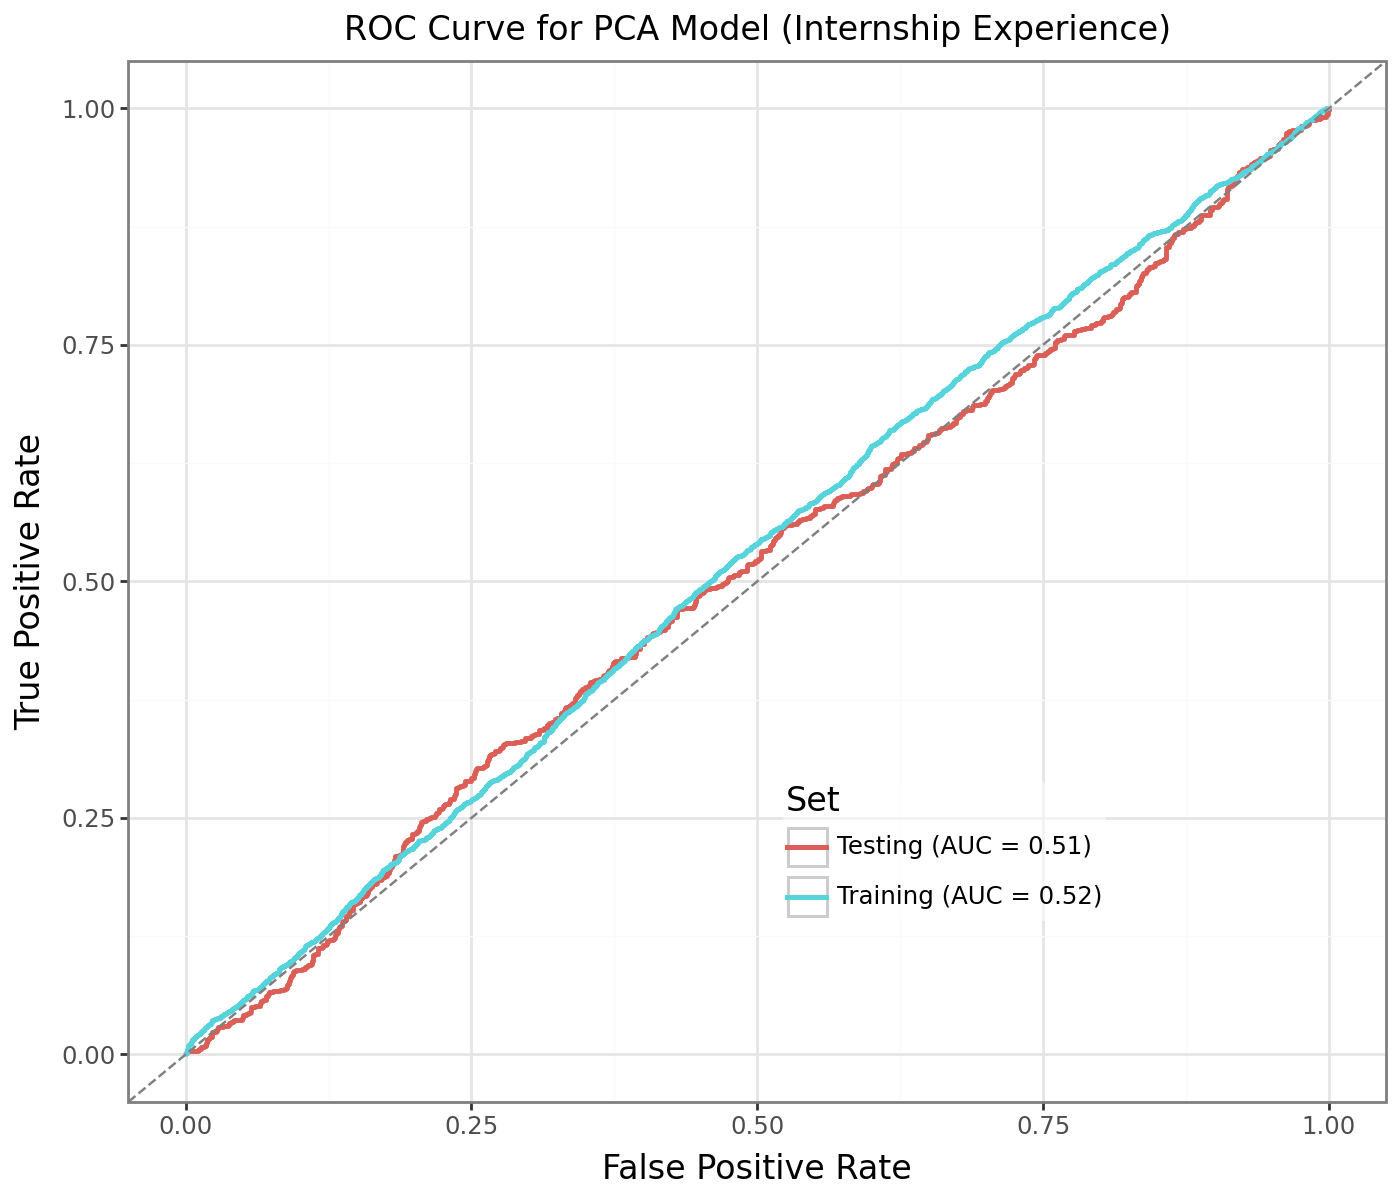

In [91]:
from sklearn.metrics import roc_curve, roc_auc_score
import pandas as pd
from plotnine import ggplot, aes, geom_line, labs, theme_bw, element_text, geom_abline

# Calculate ROC curve for training set
fpr_train, tpr_train, _ = roc_curve(y_train_q4, y_train_prob_pca_q4)
roc_auc_train_score = roc_auc_score(y_train_q4, y_train_prob_pca_q4)

# Calculate ROC curve for test set
fpr_test, tpr_test, _ = roc_curve(y_test_q4, y_test_prob_pca_q4)
roc_auc_test_score = roc_auc_score(y_test_q4, y_test_prob_pca_q4)

# Create DataFrames for plotting
roc_df_train = pd.DataFrame({
    'FPR': fpr_train,
    'TPR': tpr_train,
    'Set': f'Training (AUC = {roc_auc_train_score:.2f})'
})
roc_df_test = pd.DataFrame({
    'FPR': fpr_test,
    'TPR': tpr_test,
    'Set': f'Testing (AUC = {roc_auc_test_score:.2f})'
})

# Combine DataFrames
roc_df = pd.concat([roc_df_train, roc_df_test])

# Plotting with ggplot
p = (ggplot(roc_df, aes(x='FPR', y='TPR', color='Set'))
     + geom_line(size=1) # ROC curve for the model
     + geom_abline(intercept=0, slope=1, linetype='dashed', color='gray') # Random classifier
     + labs(title='ROC Curve for PCA Model (Internship Experience)',
            x='False Positive Rate',
            y='True Positive Rate')
     + theme_bw()
     + theme(figure_size=(7, 6),
             legend_position=(0.7, 0.2),
             legend_background=element_rect(fill='white', alpha=0.5),
             title=element_text(size=12))
)

p


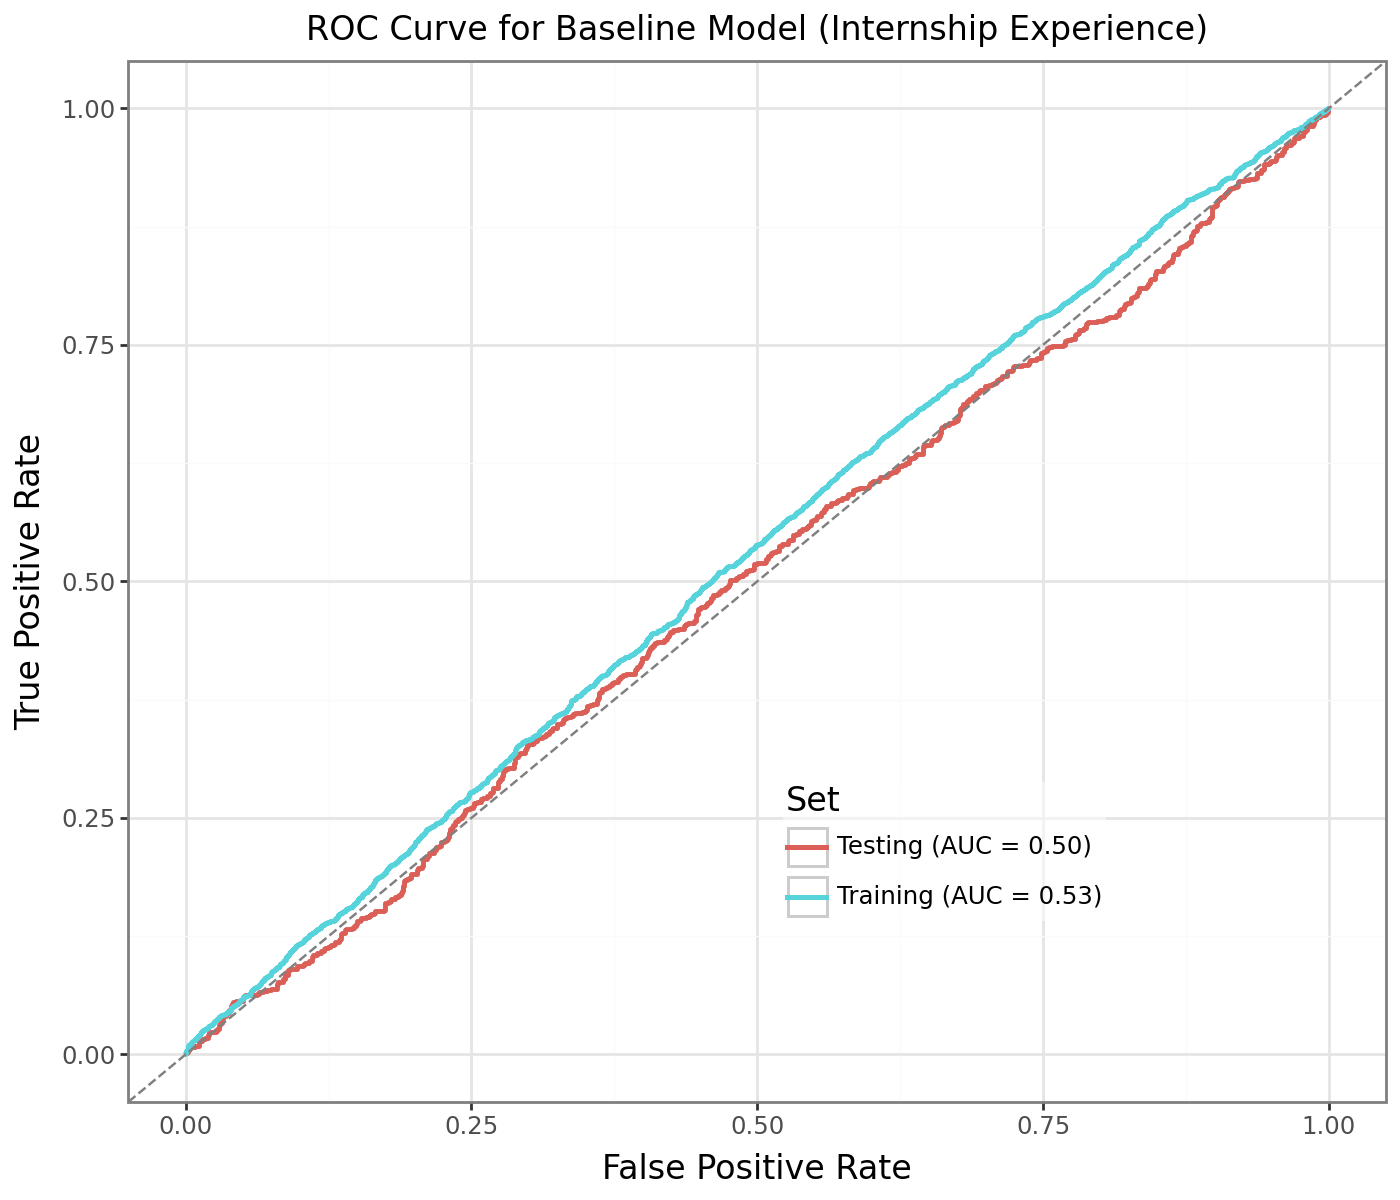

In [92]:
from sklearn.metrics import roc_curve, roc_auc_score
import pandas as pd
from plotnine import ggplot, aes, geom_line, labs, theme_bw, element_text, geom_abline

# Get probabilities for the baseline model
y_train_prob_baseline_q4 = model_baseline_q4.predict_proba(X_train_q4)[:, 1]
y_test_prob_baseline_q4 = model_baseline_q4.predict_proba(X_test_q4)[:, 1]

# Calculate ROC curve for training set
fpr_train_baseline, tpr_train_baseline, _ = roc_curve(y_train_q4, y_train_prob_baseline_q4)
roc_auc_train_baseline = roc_auc_score(y_train_q4, y_train_prob_baseline_q4)

# Calculate ROC curve for test set
fpr_test_baseline, tpr_test_baseline, _ = roc_curve(y_test_q4, y_test_prob_baseline_q4)
roc_auc_test_baseline = roc_auc_score(y_test_q4, y_test_prob_baseline_q4)

# Create DataFrames for plotting
roc_df_train_baseline = pd.DataFrame({
    'FPR': fpr_train_baseline,
    'TPR': tpr_train_baseline,
    'Set': f'Training (AUC = {roc_auc_train_baseline:.2f})'
})
roc_df_test_baseline = pd.DataFrame({
    'FPR': fpr_test_baseline,
    'TPR': tpr_test_baseline,
    'Set': f'Testing (AUC = {roc_auc_test_baseline:.2f})'
})

# Combine DataFrames
roc_df_baseline = pd.concat([roc_df_train_baseline, roc_df_test_baseline])

# Plotting with ggplot
p = (ggplot(roc_df_baseline, aes(x='FPR', y='TPR', color='Set'))
     + geom_line(size=1) # ROC curve for the model
     + geom_abline(intercept=0, slope=1, linetype='dashed', color='gray') # Random classifier
     + labs(title='ROC Curve for Baseline Model (Internship Experience)',
            x='False Positive Rate',
            y='True Positive Rate')
     + theme_bw()
     + theme(figure_size=(7, 6),
             legend_position=(0.7, 0.2),
             legend_background=element_rect(fill='white', alpha=0.5),
             title=element_text(size=12))
)

p

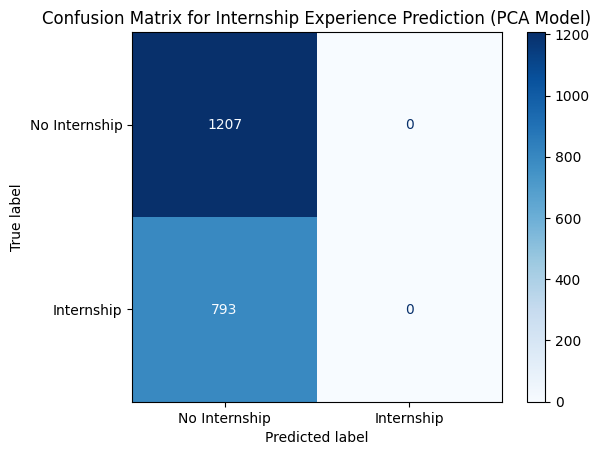

In [93]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
import matplotlib.pyplot as plt

cm_pca = confusion_matrix(y_test_q4, y_pred_pca_q4)
disp_pca = ConfusionMatrixDisplay(confusion_matrix=cm_pca, display_labels=['No Internship', 'Internship'])
disp_pca.plot(cmap='Blues')
plt.title("Confusion Matrix for Internship Experience Prediction (PCA Model)")
plt.show()

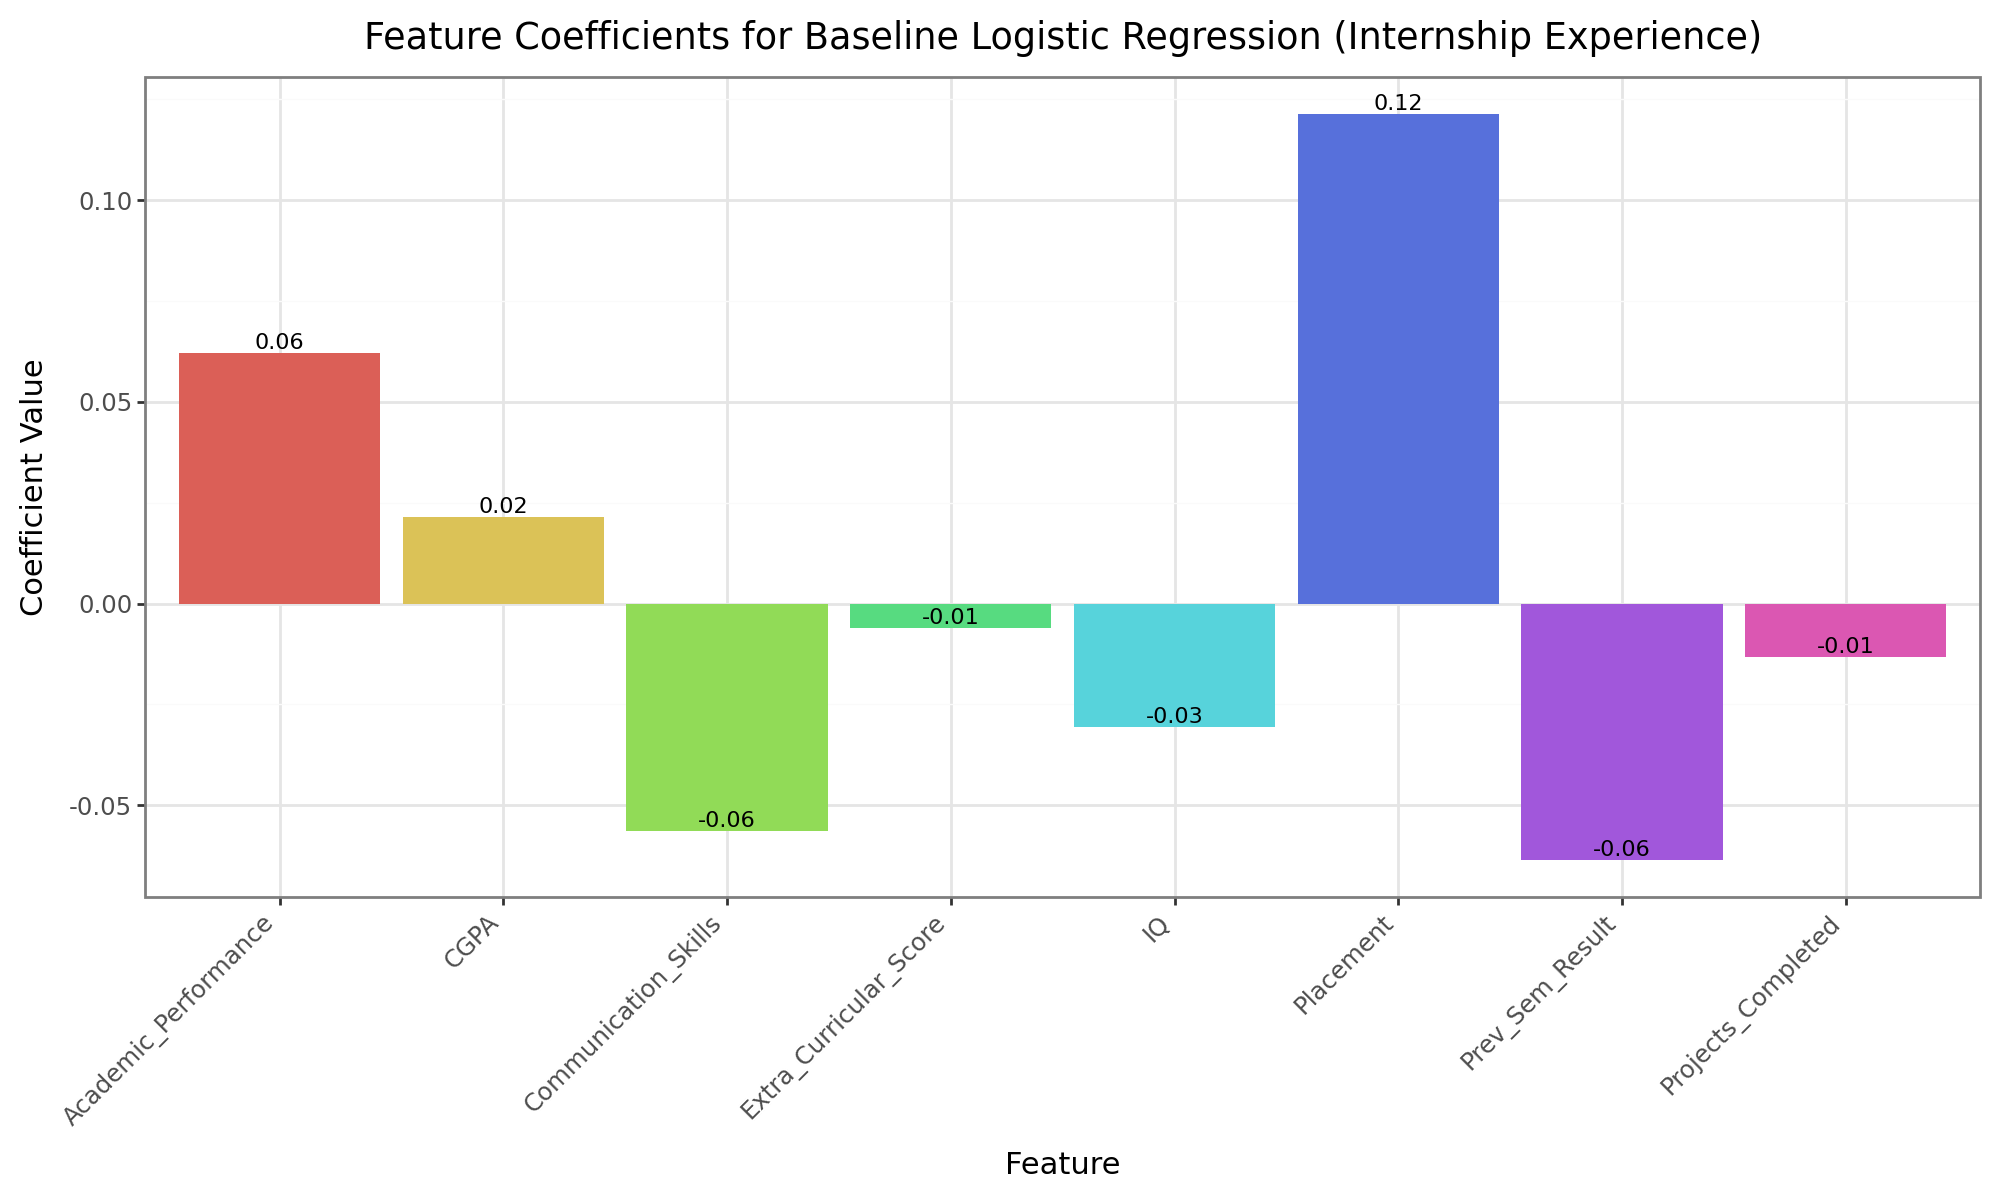

In [94]:
from plotnine import ggplot, aes, geom_bar, labs, theme_bw, element_text, geom_text
import pandas as pd

# Create a DataFrame for coefficients from the baseline model
coef_baseline_df_q4 = pd.DataFrame({
    'Feature': X_train_q4.columns,
    'Coefficient': model_baseline_q4.coef_[0]
}).sort_values(by='Coefficient', ascending=False)

# Visualize coefficients using ggplot
p = (ggplot(coef_baseline_df_q4, aes(x='Feature', y='Coefficient', fill='Feature'))
     + geom_bar(stat='identity', show_legend=False)
     + geom_text(aes(label='Coefficient'), # Add text labels
                 va='bottom', size=8, format_string='{:.2f}') # Position and format the labels to 2 decimal places
     + labs(title='Feature Coefficients for Baseline Logistic Regression (Internship Experience)',
            x='Feature',
            y='Coefficient Value')
     + theme_bw() # Apply theme_bw for a clearer background
     + theme(axis_text_x=element_text(rotation=45, hjust=1),
             figure_size=(10, 6)) # Rotate x-axis labels for readability and set figure size
    )

p

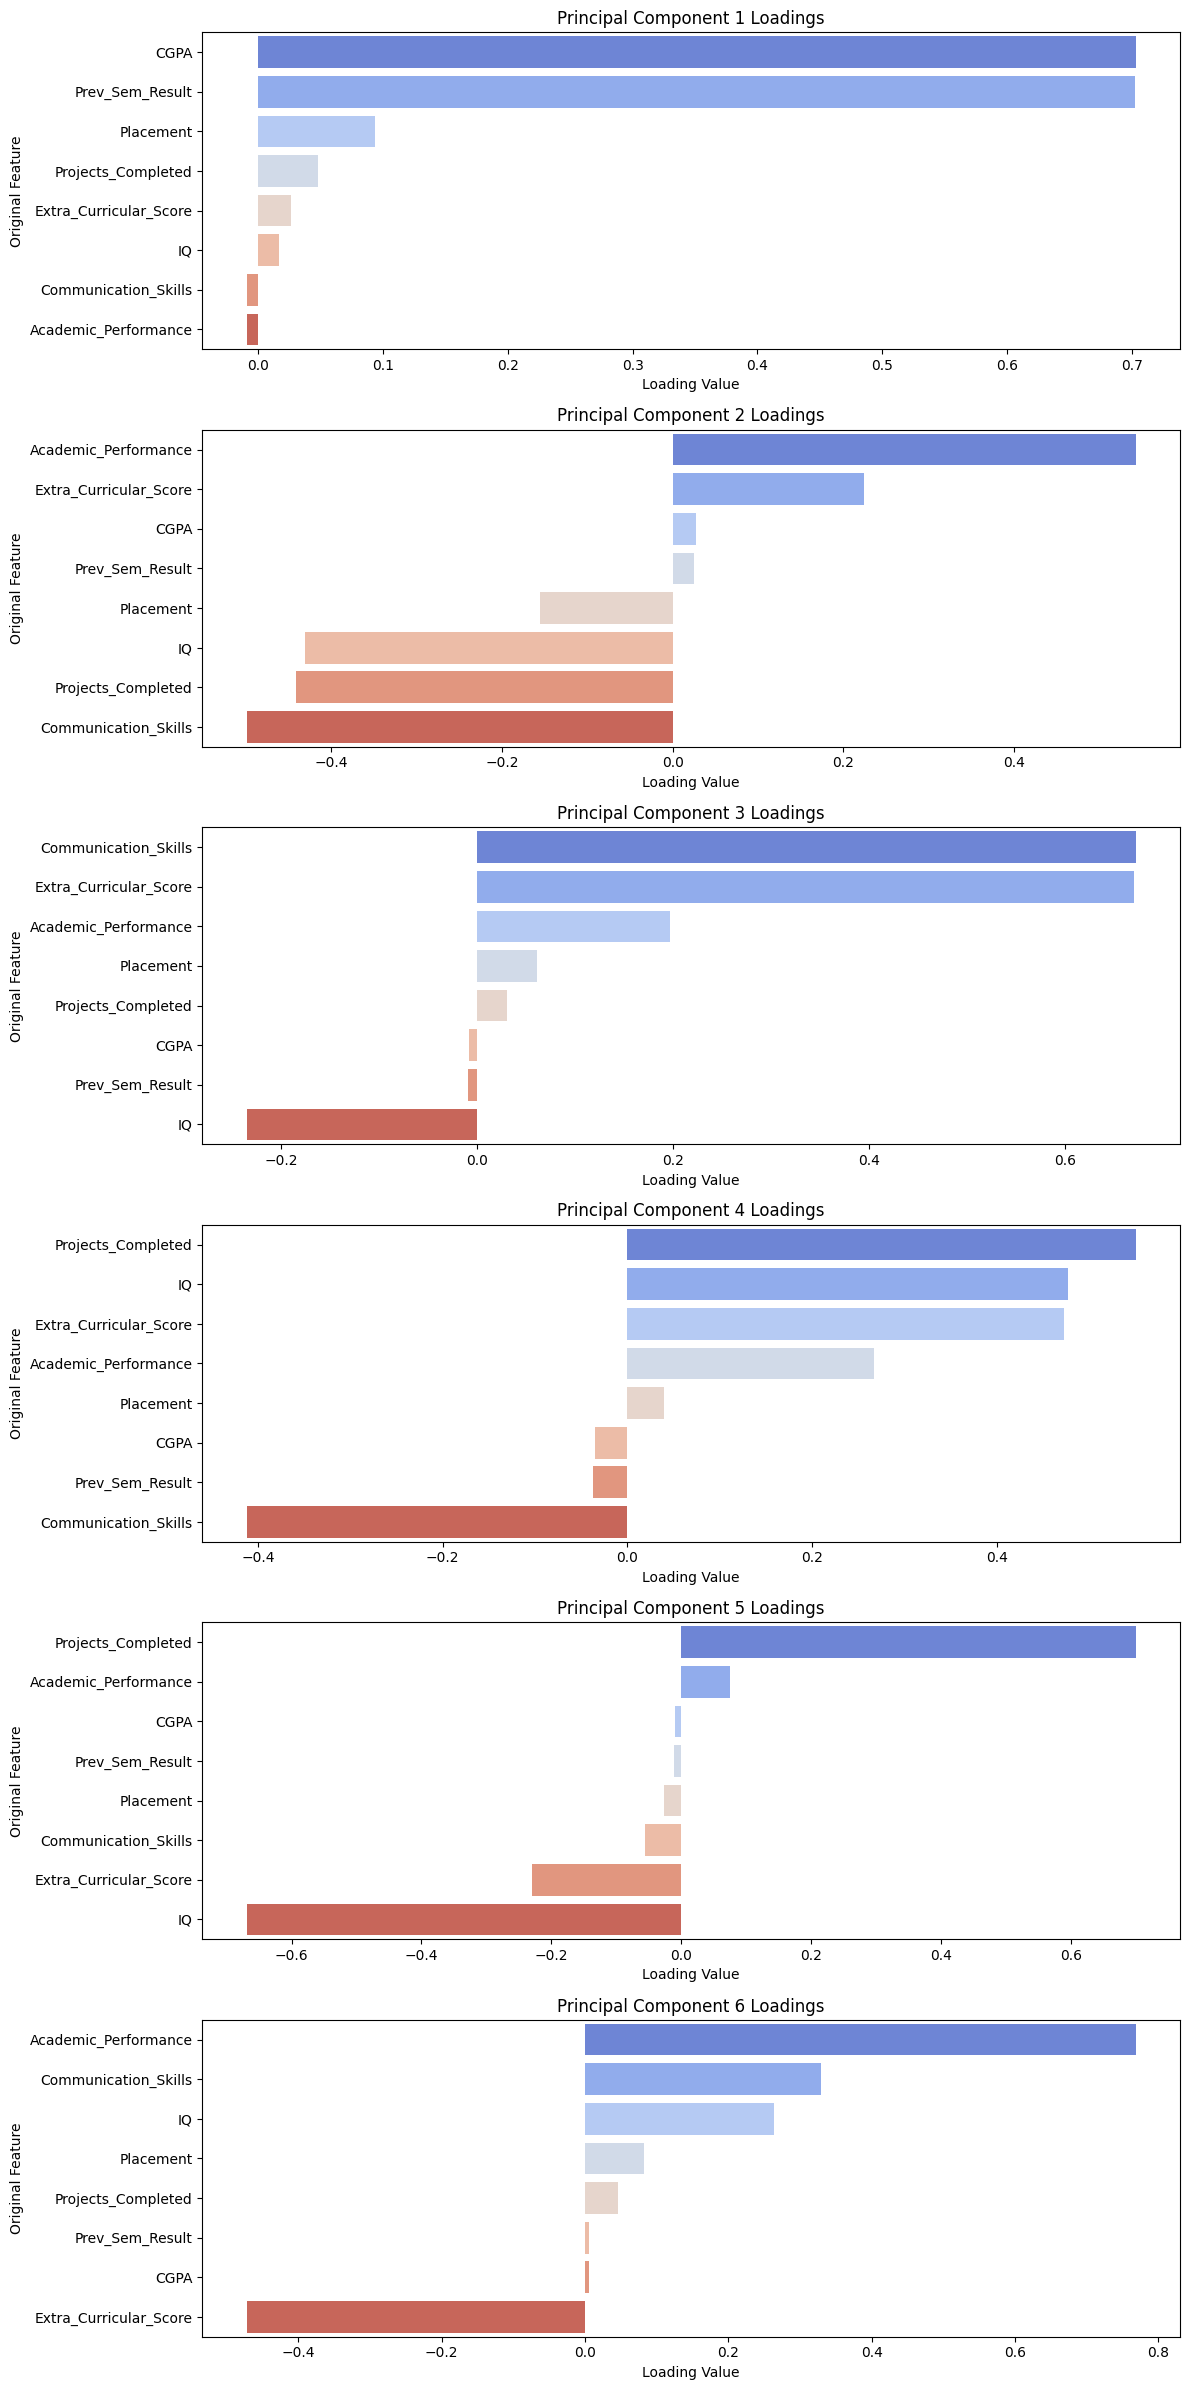

In [95]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Ensure components_df is available from previous steps
# If not, you might need to re-run the PCA fitting step:
# from sklearn.decomposition import PCA
# pca_final = PCA(n_components=6)
# pca_final.fit(X_train_q4)
# components_df = pd.DataFrame(pca_final.components_, columns=X_train_q4.columns)

num_components = components_df.shape[0]

plt.figure(figsize=(12, 4 * num_components))

for i in range(num_components):
    plt.subplot(num_components, 1, i + 1)
    # Create a DataFrame for the current component's loadings
    pc_loadings = pd.DataFrame({
        'Feature': components_df.columns,
        'Loading': components_df.iloc[i]
    }).sort_values(by='Loading', ascending=False)

    sns.barplot(x='Loading', y='Feature', data=pc_loadings, palette='coolwarm')
    plt.title(f'Principal Component {i+1} Loadings')
    plt.xlabel('Loading Value')
    plt.ylabel('Original Feature')
    plt.tight_layout()

plt.show()